### Import TensorFlow

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
# "Sequential" model lets us to define a stack of neural network layers
from keras.models import Sequential

# import the "core" layers:
from keras.layers import Dense, Dropout, Activation, Flatten

# CNN
from keras.layers import Convolution2D, MaxPooling2D

# import some utilities to transform our data
from keras.utils import np_utils

import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from tensorflow.keras import layers

### Prepare the dataset

In [3]:
import matplotlib.pyplot as plt
import os
import cv2

In [4]:
 %matplotlib inline

In [5]:
DATADIR = 'Covid19-dataset/train'
DATADIR2 = 'Covid19-dataset/test'
CATEGORIES = ['Covid','Normal','Viral Pneumonia']

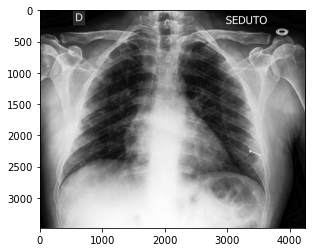

In [6]:
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
        plt.imshow(img_array)
        plt.show()
        break
    break
    
    

In [7]:
print(img_array.shape)

(3480, 4248, 3)


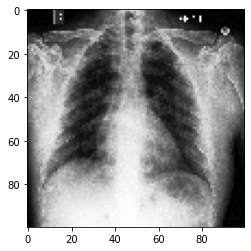

In [8]:
IMG_SIZE = 100
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap = 'gray')
plt.show()

In [9]:
training_data = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2. IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
            training_data.append([new_array,class_num])
            
create_training_data()
            

In [10]:
print(len(training_data))
print(training_data)

251
[[array([[ 6,  4,  3, ...,  6,  4,  8],
       [ 2,  1,  1, ...,  4,  2,  7],
       [ 8,  8,  6, ...,  1,  5,  7],
       ...,
       [ 1, 11, 19, ...,  1,  1,  4],
       [ 0,  8, 16, ...,  3,  5,  5],
       [ 0,  0, 18, ...,  5,  8,  7]], dtype=uint8), 0], [array([[ 53,  53,  53, ...,   2,   2,   2],
       [ 57,  59,  67, ...,   2,   2,   2],
       [ 65,  64,  80, ...,   2,   2,   2],
       ...,
       [116, 124, 140, ...,  97,  90,  83],
       [118, 126, 138, ...,  95,  89,  81],
       [116, 128, 138, ...,  93,  86,  81]], dtype=uint8), 0], [array([[  4, 177,   0, ..., 199, 192, 188],
       [  0,   0,   0, ..., 212, 214, 220],
       [  0,   0,   0, ..., 216, 212, 219],
       ...,
       [  0,   0,   0, ..., 124,  75,  33],
       [  0,   0,   0, ..., 177,  75,  44],
       [  0,   0,   0, ..., 134, 165,  63]], dtype=uint8), 0], [array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ..., 14,  0,  0],
       ...,
       [ 0,  0, 

In [11]:
import random
random.shuffle(training_data)

In [12]:
X_train = []
y_train = []
for features,label in training_data:
    X_train.append(features)
    y_train.append(label)
X_train = np.array(X_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
y_train = np.array(y_train)
    

In [13]:
test_data = []
def create_test_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR2,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2. IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
            test_data.append([new_array,class_num])
            
create_test_data()

In [14]:
print(len(test_data))

66


In [15]:
random.shuffle(test_data)

In [16]:
X_test = []
y_test = []
for features,label in test_data:
    X_test.append(features)
    y_test.append(label)
X_test = np.array(X_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
y_test = np.array(y_test)

In [17]:
(train_images, train_labels), (test_images, test_labels) = (X_train, y_train), (X_test, y_test)


### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image:


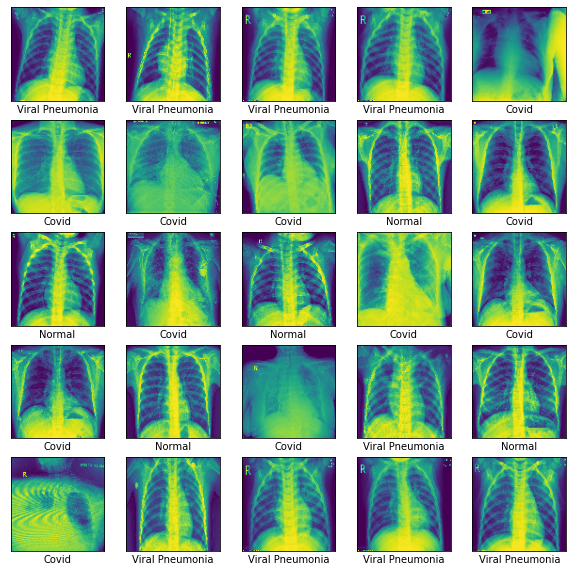

In [18]:
class_names = ['Covid', 'Normal', 'Viral Pneumonia']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [19]:
# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

# OneHotEncoding for the output label:
train_labels = np_utils.to_categorical(y_train, 3)
test_labels = np_utils.to_categorical(y_test, 3)

### Create the convolutional base

In [44]:
# Declare Sequential model fro our network:
model = Sequential()

In [45]:
# CNN first layer (with 32 3x3 filter):
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(100,100,1), padding="same"))

print(model.output_shape) # with no zero padding -> (None, 248, 248, 32)

# If your image batch is of N images of HxW size with C channels: 
# theano uses the NCHW ordering while tensorflow uses the NHWC ordering.

(None, 100, 100, 32)


In [46]:
# more hidden layers:
model.add(Convolution2D(32, (3, 3), activation='relu', padding="same"))
print(model.output_shape)

# Pooling Layer:
model.add(MaxPooling2D(pool_size=(2,2)))
print(model.output_shape)

(None, 100, 100, 32)
(None, 50, 50, 32)


In [47]:
# more hidden layers:
model.add(Convolution2D(64, (3, 3), activation='relu', padding="same"))
print(model.output_shape)

# Pooling Layer:
model.add(MaxPooling2D(pool_size=(2,2)))
print(model.output_shape)

(None, 50, 50, 64)
(None, 25, 25, 64)


In [48]:
# more hidden layers:
model.add(Convolution2D(128, (3, 3), activation='relu', padding="same"))
print(model.output_shape)

# Pooling Layer:
model.add(MaxPooling2D(pool_size=(2,2)))
print(model.output_shape)

(None, 25, 25, 128)
(None, 12, 12, 128)


In [49]:
# output Fully connected Dense layers:
model.add(Flatten())
print(model.output_shape)

model.add(Dense(128, activation='relu'))
print(model.output_shape)

model.add(Dense(3, activation='softmax'))
print(model.output_shape)

(None, 18432)
(None, 128)
(None, 3)


In [50]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],
              optimizer='adam')
# more info about loss functions: https://keras.io/losses
# more infor about Optimizers: https://keras.io/optimizers

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 100, 100, 32)      320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 25, 25, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 128)      

In [51]:
history = model.fit(train_images, train_labels, batch_size=30, epochs=10, verbose=1, validation_data=(test_images, test_labels))

Epoch 1/10
9/9 [==============================] - 1s 88ms/step - loss: 0.9547 - accuracy: 0.5896 - val_loss: 0.6818 - val_accuracy: 0.6212
Epoch 2/10
9/9 [==============================] - 1s 68ms/step - loss: 0.3595 - accuracy: 0.8566 - val_loss: 0.4351 - val_accuracy: 0.8485
Epoch 3/10
9/9 [==============================] - 1s 69ms/step - loss: 0.3045 - accuracy: 0.8964 - val_loss: 0.5180 - val_accuracy: 0.8485
Epoch 4/10
9/9 [==============================] - 1s 67ms/step - loss: 0.2917 - accuracy: 0.8725 - val_loss: 0.4559 - val_accuracy: 0.7576
Epoch 5/10
9/9 [==============================] - 1s 66ms/step - loss: 0.2181 - accuracy: 0.9044 - val_loss: 0.3562 - val_accuracy: 0.8485
Epoch 6/10
9/9 [==============================] - 1s 65ms/step - loss: 0.1381 - accuracy: 0.9283 - val_loss: 0.2996 - val_accuracy: 0.8788
Epoch 7/10
9/9 [==============================] - 1s 66ms/step - loss: 0.0866 - accuracy: 0.9721 - val_loss: 0.2806 - val_accuracy: 0.8636
Epoch 8/10
9/9 [===========

In [52]:
predicted_classes = model.predict(test_images)

In [53]:
# Testing:
score = model.evaluate(test_images, test_labels, verbose=1)
print('The accuracy is: ', score[1])

3/3 [==============================] - 0s 16ms/step - loss: 0.3026 - accuracy: 0.9242
The accuracy is:  0.9242424368858337


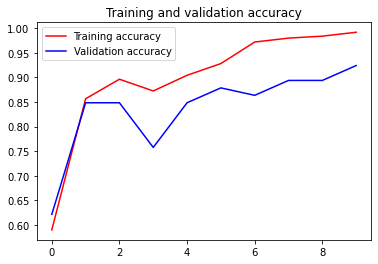

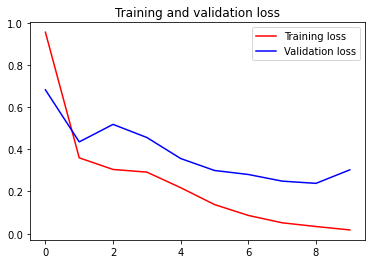

In [55]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r-', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r-', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Implement ANN

In [56]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

In [57]:
# Reshape each image pixels into a row of feature table with 100*100=10000 features (each pixel is a feature):

train_images = train_images.reshape(train_images.shape[0], 10000)

test_images = test_images.reshape(test_images.shape[0], 10000)

In [58]:
k = 100  #  k  is the number of components (new features) after dimensionality reduction

my_pca = PCA(n_components = k)

# X_Train is feature matrix of training set before dimensionality reduction, 

# X_Train_New is feature matrix of training set after dimensionality reduction:

train_images_new = my_pca.fit_transform(train_images)

test_images_new = my_pca.transform(test_images)

print(len(train_images_new[0]))
print(len(test_images_new[0]))

100
100


In [59]:
print(train_images_new.shape)
print(test_images_new.shape)

(251, 100)
(66, 100)


In [60]:
def model_creator():
    "Define the Network Architecture (model)"
    # define:
    model = Sequential()
    input_size = 100
    hidden_neurons = 100
    out_size = 3

    # design the structure:
    # second layer: hidden layer:
    model.add(Dense(hidden_neurons, input_dim = input_size))  # Nuerons
    model.add(Activation('relu')) # Activation

    # third layer: output layer:
    model.add(Dense(out_size, input_dim = hidden_neurons))  # Nuerons
    model.add(Activation('softmax')) # Activation  

    # compile:
    model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])

    # return: 
    return model 

In [61]:
seed = 2
np.random.seed(seed=2)
#I think you meant to make the seed = 2

# Use KerasClassifier class to wrap your model as an object:
ann_model = KerasClassifier(build_fn = model_creator, verbose=2)

In [62]:
# define a range for the "batch_size" 
batch_size = [30 , 50 , 100 ]

# define a range for the "epochs" 
epochs = [10, 20 , 30 , 40 , 50]

# create a dictionary for grid parameter:
param_grid = dict(batch_size = batch_size, epochs = epochs)
print(param_grid,'\n')

# creat the grid, and define the metric for evaluating the model: 
grid = GridSearchCV(ann_model, param_grid, cv=10, scoring='neg_log_loss')

# fit the grid (start the grid search):
grid.fit(train_images_new, train_labels, verbose=1)

{'batch_size': [30, 50, 100], 'epochs': [10, 20, 30, 40, 50]} 

Epoch 1/10
8/8 [==============================] - 1s 7ms/step - loss: 1.8726 - accuracy: 0.3111
Epoch 2/10
8/8 [==============================] - 0s 9ms/step - loss: 1.0048 - accuracy: 0.5600
Epoch 3/10
8/8 [==============================] - 0s 7ms/step - loss: 0.5398 - accuracy: 0.7689
Epoch 4/10
8/8 [==============================] - 0s 7ms/step - loss: 0.3317 - accuracy: 0.8933
Epoch 5/10
8/8 [==============================] - 0s 7ms/step - loss: 0.2319 - accuracy: 0.9378
Epoch 6/10
8/8 [==============================] - 0s 7ms/step - loss: 0.1748 - accuracy: 0.9511
Epoch 7/10
8/8 [==============================] - 0s 7ms/step - loss: 0.1373 - accuracy: 0.9644
Epoch 8/10
8/8 [==============================] - 0s 7ms/step - loss: 0.1116 - accuracy: 0.9911
Epoch 9/10
8/8 [==============================] - 0s 7ms/step - loss: 0.0925 - accuracy: 0.9911
Epoch 10/10
8/8 [==============================] - 0s 6ms/step - loss: 0

8/8 [==============================] - 0s 5ms/step - loss: 0.0254 - accuracy: 1.0000
Epoch 15/20
8/8 [==============================] - 0s 6ms/step - loss: 0.0230 - accuracy: 1.0000
Epoch 16/20
8/8 [==============================] - 0s 6ms/step - loss: 0.0209 - accuracy: 1.0000
Epoch 17/20
8/8 [==============================] - 0s 20ms/step - loss: 0.0191 - accuracy: 1.0000
Epoch 18/20
8/8 [==============================] - 0s 6ms/step - loss: 0.0176 - accuracy: 1.0000
Epoch 19/20
8/8 [==============================] - 0s 8ms/step - loss: 0.0162 - accuracy: 1.0000
Epoch 20/20
8/8 [==============================] - 0s 6ms/step - loss: 0.0150 - accuracy: 1.0000
Epoch 1/20
8/8 [==============================] - 1s 5ms/step - loss: 3.5835 - accuracy: 0.1681
Epoch 2/20
8/8 [==============================] - 0s 5ms/step - loss: 2.1841 - accuracy: 0.2301
Epoch 3/20
8/8 [==============================] - 0s 6ms/step - loss: 1.1578 - accuracy: 0.4867
Epoch 4/20
8/8 [============================

8/8 [==============================] - 0s 5ms/step - loss: 0.0208 - accuracy: 1.0000
Epoch 23/30
8/8 [==============================] - 0s 5ms/step - loss: 0.0193 - accuracy: 1.0000
Epoch 24/30
8/8 [==============================] - 0s 5ms/step - loss: 0.0181 - accuracy: 1.0000
Epoch 25/30
8/8 [==============================] - 0s 5ms/step - loss: 0.0168 - accuracy: 1.0000
Epoch 26/30
8/8 [==============================] - 0s 5ms/step - loss: 0.0158 - accuracy: 1.0000
Epoch 27/30
8/8 [==============================] - 0s 5ms/step - loss: 0.0149 - accuracy: 1.0000
Epoch 28/30
8/8 [==============================] - 0s 6ms/step - loss: 0.0140 - accuracy: 1.0000
Epoch 29/30
8/8 [==============================] - 0s 5ms/step - loss: 0.0132 - accuracy: 1.0000
Epoch 30/30
8/8 [==============================] - 0s 5ms/step - loss: 0.0125 - accuracy: 1.0000
Epoch 1/30
8/8 [==============================] - 1s 6ms/step - loss: 1.4104 - accuracy: 0.4292
Epoch 2/30
8/8 [===========================

8/8 [==============================] - 0s 5ms/step - loss: 0.0674 - accuracy: 0.9956
Epoch 11/30
8/8 [==============================] - 0s 5ms/step - loss: 0.0571 - accuracy: 1.0000
Epoch 12/30
8/8 [==============================] - 0s 5ms/step - loss: 0.0498 - accuracy: 1.0000
Epoch 13/30
8/8 [==============================] - 0s 6ms/step - loss: 0.0442 - accuracy: 1.0000
Epoch 14/30
8/8 [==============================] - 0s 5ms/step - loss: 0.0394 - accuracy: 1.0000
Epoch 15/30
8/8 [==============================] - 0s 5ms/step - loss: 0.0353 - accuracy: 1.0000
Epoch 16/30
8/8 [==============================] - 0s 5ms/step - loss: 0.0320 - accuracy: 1.0000
Epoch 17/30
8/8 [==============================] - 0s 5ms/step - loss: 0.0292 - accuracy: 1.0000
Epoch 18/30
8/8 [==============================] - 0s 5ms/step - loss: 0.0267 - accuracy: 1.0000
Epoch 19/30
8/8 [==============================] - 0s 5ms/step - loss: 0.0245 - accuracy: 1.0000
Epoch 20/30
8/8 [=========================

8/8 [==============================] - 0s 6ms/step - loss: 0.0241 - accuracy: 1.0000
Epoch 19/40
8/8 [==============================] - 0s 6ms/step - loss: 0.0221 - accuracy: 1.0000
Epoch 20/40
8/8 [==============================] - 0s 6ms/step - loss: 0.0203 - accuracy: 1.0000
Epoch 21/40
8/8 [==============================] - 0s 6ms/step - loss: 0.0188 - accuracy: 1.0000
Epoch 22/40
8/8 [==============================] - 0s 6ms/step - loss: 0.0174 - accuracy: 1.0000
Epoch 23/40
8/8 [==============================] - 0s 6ms/step - loss: 0.0162 - accuracy: 1.0000
Epoch 24/40
8/8 [==============================] - 0s 6ms/step - loss: 0.0151 - accuracy: 1.0000
Epoch 25/40
8/8 [==============================] - 0s 6ms/step - loss: 0.0141 - accuracy: 1.0000
Epoch 26/40
8/8 [==============================] - 0s 5ms/step - loss: 0.0132 - accuracy: 1.0000
Epoch 27/40
8/8 [==============================] - 0s 6ms/step - loss: 0.0124 - accuracy: 1.0000
Epoch 28/40
8/8 [=========================

8/8 [==============================] - 0s 5ms/step - loss: 0.0093 - accuracy: 1.0000
Epoch 27/40
8/8 [==============================] - 0s 6ms/step - loss: 0.0088 - accuracy: 1.0000
Epoch 28/40
8/8 [==============================] - 0s 7ms/step - loss: 0.0082 - accuracy: 1.0000
Epoch 29/40
8/8 [==============================] - 0s 6ms/step - loss: 0.0078 - accuracy: 1.0000
Epoch 30/40
8/8 [==============================] - 0s 6ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 31/40
8/8 [==============================] - 0s 12ms/step - loss: 0.0070 - accuracy: 1.0000
Epoch 32/40
8/8 [==============================] - 0s 6ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 33/40
8/8 [==============================] - 0s 13ms/step - loss: 0.0063 - accuracy: 1.0000
Epoch 34/40
8/8 [==============================] - 0s 16ms/step - loss: 0.0060 - accuracy: 1.0000
Epoch 35/40
8/8 [==============================] - 0s 19ms/step - loss: 0.0057 - accuracy: 1.0000
Epoch 36/40
8/8 [=====================

8/8 [==============================] - 0s 9ms/step - loss: 0.0084 - accuracy: 1.0000
Epoch 35/40
8/8 [==============================] - 0s 7ms/step - loss: 0.0080 - accuracy: 1.0000
Epoch 36/40
8/8 [==============================] - 0s 7ms/step - loss: 0.0077 - accuracy: 1.0000
Epoch 37/40
8/8 [==============================] - 0s 6ms/step - loss: 0.0073 - accuracy: 1.0000
Epoch 38/40
8/8 [==============================] - 0s 6ms/step - loss: 0.0070 - accuracy: 1.0000
Epoch 39/40
8/8 [==============================] - 0s 6ms/step - loss: 0.0067 - accuracy: 1.0000
Epoch 40/40
8/8 [==============================] - 0s 6ms/step - loss: 0.0065 - accuracy: 1.0000
Epoch 1/50
8/8 [==============================] - 1s 6ms/step - loss: 1.6799 - accuracy: 0.3689
Epoch 2/50
8/8 [==============================] - 0s 6ms/step - loss: 0.8826 - accuracy: 0.6089
Epoch 3/50
8/8 [==============================] - 0s 9ms/step - loss: 0.4527 - accuracy: 0.8267
Epoch 4/50
8/8 [=============================

8/8 [==============================] - 0s 5ms/step - loss: 0.0316 - accuracy: 1.0000
Epoch 13/50
8/8 [==============================] - 0s 5ms/step - loss: 0.0277 - accuracy: 1.0000
Epoch 14/50
8/8 [==============================] - 0s 5ms/step - loss: 0.0249 - accuracy: 1.0000
Epoch 15/50
8/8 [==============================] - 0s 6ms/step - loss: 0.0223 - accuracy: 1.0000
Epoch 16/50
8/8 [==============================] - 0s 5ms/step - loss: 0.0203 - accuracy: 1.0000
Epoch 17/50
8/8 [==============================] - 0s 6ms/step - loss: 0.0185 - accuracy: 1.0000
Epoch 18/50
8/8 [==============================] - 0s 5ms/step - loss: 0.0169 - accuracy: 1.0000
Epoch 19/50
8/8 [==============================] - 0s 5ms/step - loss: 0.0155 - accuracy: 1.0000
Epoch 20/50
8/8 [==============================] - 0s 6ms/step - loss: 0.0144 - accuracy: 1.0000
Epoch 21/50
8/8 [==============================] - 0s 5ms/step - loss: 0.0132 - accuracy: 1.0000
Epoch 22/50
8/8 [=========================

8/8 [==============================] - 0s 5ms/step - loss: 0.0097 - accuracy: 1.0000
Epoch 31/50
8/8 [==============================] - 0s 5ms/step - loss: 0.0092 - accuracy: 1.0000
Epoch 32/50
8/8 [==============================] - 0s 6ms/step - loss: 0.0087 - accuracy: 1.0000
Epoch 33/50
8/8 [==============================] - 0s 5ms/step - loss: 0.0083 - accuracy: 1.0000
Epoch 34/50
8/8 [==============================] - 0s 5ms/step - loss: 0.0079 - accuracy: 1.0000
Epoch 35/50
8/8 [==============================] - 0s 5ms/step - loss: 0.0075 - accuracy: 1.0000
Epoch 36/50
8/8 [==============================] - 0s 5ms/step - loss: 0.0071 - accuracy: 1.0000
Epoch 37/50
8/8 [==============================] - 0s 6ms/step - loss: 0.0068 - accuracy: 1.0000
Epoch 38/50
8/8 [==============================] - 0s 6ms/step - loss: 0.0065 - accuracy: 1.0000
Epoch 39/50
8/8 [==============================] - 0s 5ms/step - loss: 0.0062 - accuracy: 1.0000
Epoch 40/50
8/8 [=========================

8/8 [==============================] - 0s 5ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 49/50
8/8 [==============================] - 0s 5ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 50/50
8/8 [==============================] - 0s 5ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 1/10
5/5 [==============================] - 0s 6ms/step - loss: 2.8189 - accuracy: 0.1111
Epoch 2/10
5/5 [==============================] - 0s 6ms/step - loss: 1.9456 - accuracy: 0.2178
Epoch 3/10
5/5 [==============================] - 0s 6ms/step - loss: 1.2907 - accuracy: 0.4133
Epoch 4/10
5/5 [==============================] - 0s 6ms/step - loss: 0.8228 - accuracy: 0.6311
Epoch 5/10
5/5 [==============================] - 0s 6ms/step - loss: 0.5412 - accuracy: 0.8000
Epoch 6/10
5/5 [==============================] - 0s 6ms/step - loss: 0.3619 - accuracy: 0.8889
Epoch 7/10
5/5 [==============================] - 0s 6ms/step - loss: 0.2546 - accuracy: 0.9511
Epoch 8/10
5/5 [==============================] -

5/5 [==============================] - 0s 5ms/step - loss: 0.1186 - accuracy: 0.9823
Epoch 9/20
5/5 [==============================] - 0s 5ms/step - loss: 0.0942 - accuracy: 0.9867
Epoch 10/20
5/5 [==============================] - 0s 6ms/step - loss: 0.0771 - accuracy: 0.9956
Epoch 11/20
5/5 [==============================] - 0s 5ms/step - loss: 0.0649 - accuracy: 0.9956
Epoch 12/20
5/5 [==============================] - 0s 6ms/step - loss: 0.0550 - accuracy: 1.0000
Epoch 13/20
5/5 [==============================] - 0s 5ms/step - loss: 0.0476 - accuracy: 1.0000
Epoch 14/20
5/5 [==============================] - 0s 5ms/step - loss: 0.0425 - accuracy: 1.0000
Epoch 15/20
5/5 [==============================] - 0s 6ms/step - loss: 0.0377 - accuracy: 1.0000
Epoch 16/20
5/5 [==============================] - 0s 5ms/step - loss: 0.0338 - accuracy: 1.0000
Epoch 17/20
5/5 [==============================] - 0s 5ms/step - loss: 0.0307 - accuracy: 1.0000
Epoch 18/20
5/5 [==========================

5/5 [==============================] - 0s 6ms/step - loss: 0.1990 - accuracy: 0.9513
Epoch 7/30
5/5 [==============================] - 0s 7ms/step - loss: 0.1529 - accuracy: 0.9690
Epoch 8/30
5/5 [==============================] - 0s 6ms/step - loss: 0.1225 - accuracy: 0.9735
Epoch 9/30
5/5 [==============================] - 0s 6ms/step - loss: 0.0991 - accuracy: 0.9823
Epoch 10/30
5/5 [==============================] - 0s 5ms/step - loss: 0.0831 - accuracy: 0.9912
Epoch 11/30
5/5 [==============================] - 0s 6ms/step - loss: 0.0698 - accuracy: 0.9912
Epoch 12/30
5/5 [==============================] - 0s 6ms/step - loss: 0.0605 - accuracy: 0.9912
Epoch 13/30
5/5 [==============================] - 0s 6ms/step - loss: 0.0527 - accuracy: 0.9956
Epoch 14/30
5/5 [==============================] - 0s 6ms/step - loss: 0.0466 - accuracy: 0.9956
Epoch 15/30
5/5 [==============================] - 0s 6ms/step - loss: 0.0418 - accuracy: 0.9956
Epoch 16/30
5/5 [============================

5/5 [==============================] - 0s 6ms/step - loss: 0.0180 - accuracy: 1.0000
Epoch 25/30
5/5 [==============================] - 0s 6ms/step - loss: 0.0168 - accuracy: 1.0000
Epoch 26/30
5/5 [==============================] - 0s 5ms/step - loss: 0.0158 - accuracy: 1.0000
Epoch 27/30
5/5 [==============================] - 0s 5ms/step - loss: 0.0149 - accuracy: 1.0000
Epoch 28/30
5/5 [==============================] - 0s 5ms/step - loss: 0.0140 - accuracy: 1.0000
Epoch 29/30
5/5 [==============================] - 0s 6ms/step - loss: 0.0132 - accuracy: 1.0000
Epoch 30/30
5/5 [==============================] - 0s 6ms/step - loss: 0.0126 - accuracy: 1.0000
Epoch 1/30
5/5 [==============================] - 0s 6ms/step - loss: 1.4667 - accuracy: 0.4646
Epoch 2/30
5/5 [==============================] - 0s 8ms/step - loss: 0.9578 - accuracy: 0.6062
Epoch 3/30
5/5 [==============================] - 0s 5ms/step - loss: 0.6206 - accuracy: 0.7522
Epoch 4/30
5/5 [=============================

5/5 [==============================] - 0s 6ms/step - loss: 0.0170 - accuracy: 1.0000
Epoch 33/40
5/5 [==============================] - 0s 8ms/step - loss: 0.0161 - accuracy: 1.0000
Epoch 34/40
5/5 [==============================] - 0s 8ms/step - loss: 0.0154 - accuracy: 1.0000
Epoch 35/40
5/5 [==============================] - 0s 7ms/step - loss: 0.0147 - accuracy: 1.0000
Epoch 36/40
5/5 [==============================] - 0s 7ms/step - loss: 0.0140 - accuracy: 1.0000
Epoch 37/40
5/5 [==============================] - 0s 7ms/step - loss: 0.0134 - accuracy: 1.0000
Epoch 38/40
5/5 [==============================] - 0s 6ms/step - loss: 0.0129 - accuracy: 1.0000
Epoch 39/40
5/5 [==============================] - 0s 7ms/step - loss: 0.0123 - accuracy: 1.0000
Epoch 40/40
5/5 [==============================] - 0s 7ms/step - loss: 0.0118 - accuracy: 1.0000
Epoch 1/40
5/5 [==============================] - 1s 6ms/step - loss: 1.6342 - accuracy: 0.3850
Epoch 2/40
5/5 [===========================

5/5 [==============================] - 0s 8ms/step - loss: 0.0093 - accuracy: 1.0000
Epoch 1/40
5/5 [==============================] - 1s 6ms/step - loss: 1.5305 - accuracy: 0.3894
Epoch 2/40
5/5 [==============================] - 0s 7ms/step - loss: 0.9805 - accuracy: 0.6062
Epoch 3/40
5/5 [==============================] - 0s 7ms/step - loss: 0.6224 - accuracy: 0.7478
Epoch 4/40
5/5 [==============================] - 0s 5ms/step - loss: 0.4170 - accuracy: 0.8496
Epoch 5/40
5/5 [==============================] - 0s 7ms/step - loss: 0.2807 - accuracy: 0.9071
Epoch 6/40
5/5 [==============================] - 0s 5ms/step - loss: 0.2002 - accuracy: 0.9602
Epoch 7/40
5/5 [==============================] - 0s 6ms/step - loss: 0.1521 - accuracy: 0.9646
Epoch 8/40
5/5 [==============================] - 0s 6ms/step - loss: 0.1194 - accuracy: 0.9823
Epoch 9/40
5/5 [==============================] - 0s 6ms/step - loss: 0.0956 - accuracy: 0.9867
Epoch 10/40
5/5 [==============================] - 

5/5 [==============================] - 0s 7ms/step - loss: 0.2091 - accuracy: 0.9467
Epoch 9/50
5/5 [==============================] - 0s 5ms/step - loss: 0.1602 - accuracy: 0.9733
Epoch 10/50
5/5 [==============================] - 0s 5ms/step - loss: 0.1304 - accuracy: 0.9822
Epoch 11/50
5/5 [==============================] - 0s 5ms/step - loss: 0.1078 - accuracy: 0.9911
Epoch 12/50
5/5 [==============================] - 0s 6ms/step - loss: 0.0918 - accuracy: 0.9911
Epoch 13/50
5/5 [==============================] - 0s 7ms/step - loss: 0.0797 - accuracy: 0.9956
Epoch 14/50
5/5 [==============================] - 0s 6ms/step - loss: 0.0703 - accuracy: 1.0000
Epoch 15/50
5/5 [==============================] - 0s 5ms/step - loss: 0.0624 - accuracy: 1.0000
Epoch 16/50
5/5 [==============================] - 0s 6ms/step - loss: 0.0563 - accuracy: 1.0000
Epoch 17/50
5/5 [==============================] - 0s 8ms/step - loss: 0.0512 - accuracy: 1.0000
Epoch 18/50
5/5 [==========================

5/5 [==============================] - 0s 6ms/step - loss: 0.0287 - accuracy: 1.0000
Epoch 27/50
5/5 [==============================] - 0s 7ms/step - loss: 0.0270 - accuracy: 1.0000
Epoch 28/50
5/5 [==============================] - 0s 8ms/step - loss: 0.0256 - accuracy: 1.0000
Epoch 29/50
5/5 [==============================] - 0s 9ms/step - loss: 0.0242 - accuracy: 1.0000
Epoch 30/50
5/5 [==============================] - 0s 6ms/step - loss: 0.0230 - accuracy: 1.0000
Epoch 31/50
5/5 [==============================] - 0s 5ms/step - loss: 0.0218 - accuracy: 1.0000
Epoch 32/50
5/5 [==============================] - 0s 5ms/step - loss: 0.0208 - accuracy: 1.0000
Epoch 33/50
5/5 [==============================] - 0s 7ms/step - loss: 0.0198 - accuracy: 1.0000
Epoch 34/50
5/5 [==============================] - 0s 7ms/step - loss: 0.0188 - accuracy: 1.0000
Epoch 35/50
5/5 [==============================] - 0s 6ms/step - loss: 0.0180 - accuracy: 1.0000
Epoch 36/50
5/5 [=========================

5/5 [==============================] - 0s 5ms/step - loss: 0.0089 - accuracy: 1.0000
Epoch 45/50
5/5 [==============================] - 0s 6ms/step - loss: 0.0086 - accuracy: 1.0000
Epoch 46/50
5/5 [==============================] - 0s 6ms/step - loss: 0.0083 - accuracy: 1.0000
Epoch 47/50
5/5 [==============================] - 0s 5ms/step - loss: 0.0080 - accuracy: 1.0000
Epoch 48/50
5/5 [==============================] - 0s 5ms/step - loss: 0.0077 - accuracy: 1.0000
Epoch 49/50
5/5 [==============================] - 0s 5ms/step - loss: 0.0075 - accuracy: 1.0000
Epoch 50/50
5/5 [==============================] - ETA: 0s - loss: 0.0071 - accuracy: 1.00 - 0s 6ms/step - loss: 0.0072 - accuracy: 1.0000
Epoch 1/50
5/5 [==============================] - 0s 6ms/step - loss: 1.7892 - accuracy: 0.2212
Epoch 2/50
5/5 [==============================] - 0s 6ms/step - loss: 1.1276 - accuracy: 0.4735
Epoch 3/50
5/5 [==============================] - 0s 6ms/step - loss: 0.6995 - accuracy: 0.7345
Epo

3/3 [==============================] - 0s 5ms/step - loss: 1.7884 - accuracy: 0.2522
Epoch 3/10
3/3 [==============================] - 0s 6ms/step - loss: 1.3899 - accuracy: 0.3628
Epoch 4/10
3/3 [==============================] - 0s 7ms/step - loss: 1.0571 - accuracy: 0.4912
Epoch 5/10
3/3 [==============================] - 0s 6ms/step - loss: 0.8010 - accuracy: 0.6770
Epoch 6/10
3/3 [==============================] - 0s 8ms/step - loss: 0.6037 - accuracy: 0.7876
Epoch 7/10
3/3 [==============================] - 0s 10ms/step - loss: 0.4637 - accuracy: 0.8628
Epoch 8/10
3/3 [==============================] - 0s 7ms/step - loss: 0.3655 - accuracy: 0.9071
Epoch 9/10
3/3 [==============================] - 0s 8ms/step - loss: 0.2936 - accuracy: 0.9292
Epoch 10/10
3/3 [==============================] - 0s 13ms/step - loss: 0.2400 - accuracy: 0.9469
Epoch 1/10
3/3 [==============================] - 1s 109ms/step - loss: 2.0846 - accuracy: 0.2080
Epoch 2/10
3/3 [==============================

Epoch 2/20
3/3 [==============================] - 0s 6ms/step - loss: 1.7684 - accuracy: 0.2655
Epoch 3/20
3/3 [==============================] - 0s 7ms/step - loss: 1.4080 - accuracy: 0.3628
Epoch 4/20
3/3 [==============================] - 0s 7ms/step - loss: 1.0968 - accuracy: 0.5044
Epoch 5/20
3/3 [==============================] - 0s 6ms/step - loss: 0.8513 - accuracy: 0.6239
Epoch 6/20
3/3 [==============================] - 0s 7ms/step - loss: 0.6550 - accuracy: 0.7168
Epoch 7/20
3/3 [==============================] - 0s 6ms/step - loss: 0.5071 - accuracy: 0.8097
Epoch 8/20
3/3 [==============================] - 0s 6ms/step - loss: 0.3976 - accuracy: 0.8938
Epoch 9/20
3/3 [==============================] - 0s 6ms/step - loss: 0.3189 - accuracy: 0.9248
Epoch 10/20
3/3 [==============================] - 0s 6ms/step - loss: 0.2587 - accuracy: 0.9469
Epoch 11/20
3/3 [==============================] - 0s 6ms/step - loss: 0.2151 - accuracy: 0.9558
Epoch 12/20
3/3 [=====================

3/3 [==============================] - 0s 5ms/step - loss: 0.0466 - accuracy: 1.0000
Epoch 21/30
3/3 [==============================] - 0s 6ms/step - loss: 0.0430 - accuracy: 1.0000
Epoch 22/30
3/3 [==============================] - 0s 6ms/step - loss: 0.0401 - accuracy: 1.0000
Epoch 23/30
3/3 [==============================] - 0s 6ms/step - loss: 0.0373 - accuracy: 1.0000
Epoch 24/30
3/3 [==============================] - 0s 6ms/step - loss: 0.0349 - accuracy: 1.0000
Epoch 25/30
3/3 [==============================] - 0s 6ms/step - loss: 0.0329 - accuracy: 1.0000
Epoch 26/30
3/3 [==============================] - 0s 5ms/step - loss: 0.0308 - accuracy: 1.0000
Epoch 27/30
3/3 [==============================] - 0s 5ms/step - loss: 0.0290 - accuracy: 1.0000
Epoch 28/30
3/3 [==============================] - 0s 5ms/step - loss: 0.0275 - accuracy: 1.0000
Epoch 29/30
3/3 [==============================] - 0s 5ms/step - loss: 0.0258 - accuracy: 1.0000
Epoch 30/30
3/3 [=========================

3/3 [==============================] - 0s 5ms/step - loss: 0.7794 - accuracy: 0.6903
Epoch 9/30
3/3 [==============================] - 0s 6ms/step - loss: 0.5981 - accuracy: 0.7743
Epoch 10/30
3/3 [==============================] - 0s 6ms/step - loss: 0.4606 - accuracy: 0.8496
Epoch 11/30
3/3 [==============================] - 0s 6ms/step - loss: 0.3650 - accuracy: 0.9071
Epoch 12/30
3/3 [==============================] - 0s 6ms/step - loss: 0.2955 - accuracy: 0.9425
Epoch 13/30
3/3 [==============================] - 0s 6ms/step - loss: 0.2444 - accuracy: 0.9558
Epoch 14/30
3/3 [==============================] - 0s 5ms/step - loss: 0.2076 - accuracy: 0.9646
Epoch 15/30
3/3 [==============================] - 0s 6ms/step - loss: 0.1788 - accuracy: 0.9823
Epoch 16/30
3/3 [==============================] - 0s 5ms/step - loss: 0.1568 - accuracy: 0.9823
Epoch 17/30
3/3 [==============================] - 0s 6ms/step - loss: 0.1382 - accuracy: 0.9867
Epoch 18/30
3/3 [==========================

3/3 [==============================] - 0s 7ms/step - loss: 0.2217 - accuracy: 0.9336
Epoch 7/40
3/3 [==============================] - 0s 7ms/step - loss: 0.1773 - accuracy: 0.9513
Epoch 8/40
3/3 [==============================] - 0s 13ms/step - loss: 0.1455 - accuracy: 0.9690
Epoch 9/40
3/3 [==============================] - 0s 15ms/step - loss: 0.1220 - accuracy: 0.9735
Epoch 10/40
3/3 [==============================] - 0s 8ms/step - loss: 0.1026 - accuracy: 0.9912
Epoch 11/40
3/3 [==============================] - 0s 8ms/step - loss: 0.0882 - accuracy: 0.9912
Epoch 12/40
3/3 [==============================] - 0s 6ms/step - loss: 0.0767 - accuracy: 0.9956
Epoch 13/40
3/3 [==============================] - 0s 7ms/step - loss: 0.0669 - accuracy: 0.9956
Epoch 14/40
3/3 [==============================] - 0s 8ms/step - loss: 0.0592 - accuracy: 0.9956
Epoch 15/40
3/3 [==============================] - 0s 7ms/step - loss: 0.0524 - accuracy: 0.9956
Epoch 16/40
3/3 [==========================

3/3 [==============================] - 0s 5ms/step - loss: 0.1322 - accuracy: 0.9779
Epoch 14/40
3/3 [==============================] - 0s 5ms/step - loss: 0.1144 - accuracy: 0.9823
Epoch 15/40
3/3 [==============================] - 0s 6ms/step - loss: 0.1014 - accuracy: 0.9823
Epoch 16/40
3/3 [==============================] - 0s 6ms/step - loss: 0.0895 - accuracy: 0.9867
Epoch 17/40
3/3 [==============================] - 0s 5ms/step - loss: 0.0800 - accuracy: 0.9912
Epoch 18/40
3/3 [==============================] - 0s 5ms/step - loss: 0.0723 - accuracy: 0.9912
Epoch 19/40
3/3 [==============================] - 0s 6ms/step - loss: 0.0652 - accuracy: 0.9956
Epoch 20/40
3/3 [==============================] - 0s 5ms/step - loss: 0.0597 - accuracy: 1.0000
Epoch 21/40
3/3 [==============================] - 0s 5ms/step - loss: 0.0552 - accuracy: 1.0000
Epoch 22/40
3/3 [==============================] - 0s 5ms/step - loss: 0.0510 - accuracy: 1.0000
Epoch 23/40
3/3 [=========================

3/3 [==============================] - 0s 6ms/step - loss: 0.0710 - accuracy: 1.0000
Epoch 22/50
3/3 [==============================] - 0s 5ms/step - loss: 0.0657 - accuracy: 1.0000
Epoch 23/50
3/3 [==============================] - 0s 5ms/step - loss: 0.0611 - accuracy: 1.0000
Epoch 24/50
3/3 [==============================] - 0s 5ms/step - loss: 0.0571 - accuracy: 1.0000
Epoch 25/50
3/3 [==============================] - 0s 6ms/step - loss: 0.0534 - accuracy: 1.0000
Epoch 26/50
3/3 [==============================] - 0s 5ms/step - loss: 0.0503 - accuracy: 1.0000
Epoch 27/50
3/3 [==============================] - 0s 5ms/step - loss: 0.0474 - accuracy: 1.0000
Epoch 28/50
3/3 [==============================] - 0s 5ms/step - loss: 0.0447 - accuracy: 1.0000
Epoch 29/50
3/3 [==============================] - 0s 6ms/step - loss: 0.0424 - accuracy: 1.0000
Epoch 30/50
3/3 [==============================] - 0s 6ms/step - loss: 0.0403 - accuracy: 1.0000
Epoch 31/50
3/3 [=========================

3/3 [==============================] - 0s 5ms/step - loss: 0.0225 - accuracy: 1.0000
Epoch 40/50
3/3 [==============================] - 0s 5ms/step - loss: 0.0216 - accuracy: 1.0000
Epoch 41/50
3/3 [==============================] - 0s 6ms/step - loss: 0.0207 - accuracy: 1.0000
Epoch 42/50
3/3 [==============================] - 0s 5ms/step - loss: 0.0199 - accuracy: 1.0000
Epoch 43/50
3/3 [==============================] - 0s 6ms/step - loss: 0.0192 - accuracy: 1.0000
Epoch 44/50
3/3 [==============================] - 0s 6ms/step - loss: 0.0185 - accuracy: 1.0000
Epoch 45/50
3/3 [==============================] - 0s 6ms/step - loss: 0.0178 - accuracy: 1.0000
Epoch 46/50
3/3 [==============================] - 0s 6ms/step - loss: 0.0172 - accuracy: 1.0000
Epoch 47/50
3/3 [==============================] - 0s 6ms/step - loss: 0.0166 - accuracy: 1.0000
Epoch 48/50
3/3 [==============================] - 0s 6ms/step - loss: 0.0161 - accuracy: 1.0000
Epoch 49/50
3/3 [=========================

3/3 [==============================] - 0s 5ms/step - loss: 0.2507 - accuracy: 0.9292
Epoch 8/50
3/3 [==============================] - 0s 6ms/step - loss: 0.2068 - accuracy: 0.9469
Epoch 9/50
3/3 [==============================] - 0s 6ms/step - loss: 0.1719 - accuracy: 0.9646
Epoch 10/50
3/3 [==============================] - 0s 5ms/step - loss: 0.1457 - accuracy: 0.9690
Epoch 11/50
3/3 [==============================] - 0s 5ms/step - loss: 0.1248 - accuracy: 0.9735
Epoch 12/50
3/3 [==============================] - 0s 5ms/step - loss: 0.1095 - accuracy: 0.9779
Epoch 13/50
3/3 [==============================] - 0s 5ms/step - loss: 0.0966 - accuracy: 0.9823
Epoch 14/50
3/3 [==============================] - 0s 5ms/step - loss: 0.0855 - accuracy: 0.9867
Epoch 15/50
3/3 [==============================] - 0s 6ms/step - loss: 0.0764 - accuracy: 0.9912
Epoch 16/50
3/3 [==============================] - 0s 6ms/step - loss: 0.0686 - accuracy: 0.9956
Epoch 17/50
3/3 [===========================

9/9 [==============================] - 0s 5ms/step - loss: 0.0115 - accuracy: 1.0000
Epoch 26/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0107 - accuracy: 1.0000
Epoch 27/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0100 - accuracy: 1.0000
Epoch 28/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0095 - accuracy: 1.0000
Epoch 29/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0089 - accuracy: 1.0000
Epoch 30/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0084 - accuracy: 1.0000
Epoch 31/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0080 - accuracy: 1.0000
Epoch 32/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0076 - accuracy: 1.0000
Epoch 33/40
9/9 [==============================] - 0s 11ms/step - loss: 0.0072 - accuracy: 1.0000
Epoch 34/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0068 - accuracy: 1.0000
Epoch 35/40
9/9 [========================

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x00000149ABE727F0>,
             param_grid={'batch_size': [30, 50, 100],
                         'epochs': [10, 20, 30, 40, 50]},
             scoring='neg_log_loss')

In [63]:
# view the best results corresponding to the best structure of KerasClassifier:
print(grid.best_score_)
print(grid.best_params_)

# Prediction:
ann_pridict = grid.best_estimator_.model.predict(test_images_new, verbose=1)
print (ann_pridict.shape)

# Evaluation:
ann_score = grid.best_estimator_.model.evaluate(test_images_new, test_labels, verbose=1)
print('The accuracy is: ', ann_score[1])

-0.1913588881226484
{'batch_size': 30, 'epochs': 40}
3/3 [==============================] - 0s 2ms/step
(66, 3)
3/3 [==============================] - 0s 5ms/step - loss: 0.3349 - accuracy: 0.8636
The accuracy is:  0.8636363744735718


In [64]:
history2 = ann_model.fit(train_images_new, train_labels, batch_size=30, epochs=40, verbose=1, validation_data=(test_images_new, test_labels))

Epoch 1/40
9/9 [==============================] - 1s 29ms/step - loss: 1.7414 - accuracy: 0.3705 - val_loss: 1.4662 - val_accuracy: 0.4242
Epoch 2/40
9/9 [==============================] - 0s 12ms/step - loss: 0.9422 - accuracy: 0.6056 - val_loss: 0.9758 - val_accuracy: 0.5758
Epoch 3/40
9/9 [==============================] - 0s 13ms/step - loss: 0.5304 - accuracy: 0.8127 - val_loss: 0.7330 - val_accuracy: 0.6667
Epoch 4/40
9/9 [==============================] - 0s 12ms/step - loss: 0.3306 - accuracy: 0.9004 - val_loss: 0.6408 - val_accuracy: 0.7424
Epoch 5/40
9/9 [==============================] - 0s 12ms/step - loss: 0.2232 - accuracy: 0.9323 - val_loss: 0.5809 - val_accuracy: 0.8030
Epoch 6/40
9/9 [==============================] - 0s 11ms/step - loss: 0.1613 - accuracy: 0.9681 - val_loss: 0.5242 - val_accuracy: 0.8182
Epoch 7/40
9/9 [==============================] - 0s 10ms/step - loss: 0.1241 - accuracy: 0.9801 - val_loss: 0.4843 - val_accuracy: 0.8485
Epoch 8/40
9/9 [===========

In [65]:
predicted_classes2 = ann_model.predict(test_images_new)

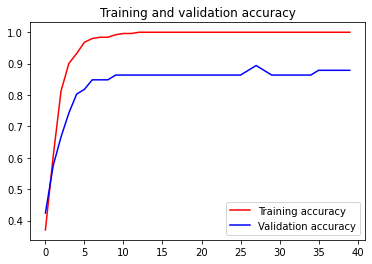

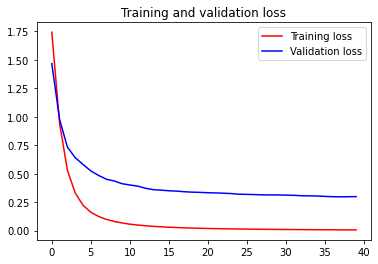

In [66]:
accuracy = history2.history['accuracy']
val_accuracy = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r-', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r-', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [67]:
# ANN using MLPClassifier
from sklearn.neural_network import MLPClassifier

In [70]:
# define a range for the "number of neurons" in the hidden layer for a network with 1 hidden layer:
neuron_number = [(i,) for i in range(5,250,5)]

# create a dictionary for grid parameter:
param_grid = dict(hidden_layer_sizes = neuron_number)
print(param_grid,'\n')

# instantiate the model:
my_ANN = MLPClassifier(activation='logistic', solver='adam', 
                                         alpha=1, random_state=1, 
                                          learning_rate_init = 0.02,
                                          verbose=True, tol=0.0001, max_iter=400)

# creat the grid, and define the metric for evaluating the model: 
grid = GridSearchCV(my_ANN, param_grid, cv=10, scoring='accuracy')

# fit the grid (start the grid search):
grid.fit(train_images_new, train_labels)

{'hidden_layer_sizes': [(5,), (10,), (15,), (20,), (25,), (30,), (35,), (40,), (45,), (50,), (55,), (60,), (65,), (70,), (75,), (80,), (85,), (90,), (95,), (100,), (105,), (110,), (115,), (120,), (125,), (130,), (135,), (140,), (145,), (150,), (155,), (160,), (165,), (170,), (175,), (180,), (185,), (190,), (195,), (200,), (205,), (210,), (215,), (220,), (225,), (230,), (235,), (240,), (245,)]} 

Iteration 1, loss = 2.21031050
Iteration 2, loss = 2.03151957
Iteration 3, loss = 1.89750485
Iteration 4, loss = 1.79104211
Iteration 5, loss = 1.70058811
Iteration 6, loss = 1.61901430
Iteration 7, loss = 1.54156746
Iteration 8, loss = 1.47062215
Iteration 9, loss = 1.40726491
Iteration 10, loss = 1.34887096
Iteration 11, loss = 1.29808998
Iteration 12, loss = 1.24988548
Iteration 13, loss = 1.20554573
Iteration 14, loss = 1.16441278
Iteration 15, loss = 1.12714358
Iteration 16, loss = 1.09213624
Iteration 17, loss = 1.05929376
Iteration 18, loss = 1.02951863
Iteration 19, loss = 1.00235691
It

Iteration 56, loss = 0.60411007
Iteration 57, loss = 0.59820224
Iteration 58, loss = 0.59453104
Iteration 59, loss = 0.58998833
Iteration 60, loss = 0.58702916
Iteration 61, loss = 0.58301508
Iteration 62, loss = 0.57928819
Iteration 63, loss = 0.57758390
Iteration 64, loss = 0.57566333
Iteration 65, loss = 0.56965094
Iteration 66, loss = 0.56435775
Iteration 67, loss = 0.56309253
Iteration 68, loss = 0.55997553
Iteration 69, loss = 0.55434413
Iteration 70, loss = 0.55055179
Iteration 71, loss = 0.54952296
Iteration 72, loss = 0.54817932
Iteration 73, loss = 0.54574468
Iteration 74, loss = 0.54478849
Iteration 75, loss = 0.54029254
Iteration 76, loss = 0.53663589
Iteration 77, loss = 0.53552754
Iteration 78, loss = 0.53493831
Iteration 79, loss = 0.53202425
Iteration 80, loss = 0.53026864
Iteration 81, loss = 0.53014386
Iteration 82, loss = 0.52885286
Iteration 83, loss = 0.52701599
Iteration 84, loss = 0.52484209
Iteration 85, loss = 0.52334872
Iteration 86, loss = 0.52276104
Iteratio

Iteration 59, loss = 0.57536706
Iteration 60, loss = 0.57023475
Iteration 61, loss = 0.56579496
Iteration 62, loss = 0.56424813
Iteration 63, loss = 0.56474826
Iteration 64, loss = 0.56337788
Iteration 65, loss = 0.55664613
Iteration 66, loss = 0.54970121
Iteration 67, loss = 0.54693144
Iteration 68, loss = 0.54463095
Iteration 69, loss = 0.54107623
Iteration 70, loss = 0.53913913
Iteration 71, loss = 0.53841067
Iteration 72, loss = 0.53805687
Iteration 73, loss = 0.53648727
Iteration 74, loss = 0.53534242
Iteration 75, loss = 0.52984505
Iteration 76, loss = 0.52665811
Iteration 77, loss = 0.52639365
Iteration 78, loss = 0.52678608
Iteration 79, loss = 0.52342042
Iteration 80, loss = 0.52020699
Iteration 81, loss = 0.51944386
Iteration 82, loss = 0.51871597
Iteration 83, loss = 0.51792341
Iteration 84, loss = 0.51700509
Iteration 85, loss = 0.51551630
Iteration 86, loss = 0.51414688
Iteration 87, loss = 0.51223725
Iteration 88, loss = 0.51088949
Iteration 89, loss = 0.51064407
Iteratio

Iteration 8, loss = 1.47392475
Iteration 9, loss = 1.41346894
Iteration 10, loss = 1.35620528
Iteration 11, loss = 1.30392613
Iteration 12, loss = 1.25443632
Iteration 13, loss = 1.21017281
Iteration 14, loss = 1.16957765
Iteration 15, loss = 1.13138174
Iteration 16, loss = 1.09588274
Iteration 17, loss = 1.06225679
Iteration 18, loss = 1.03147114
Iteration 19, loss = 1.00340319
Iteration 20, loss = 0.97843045
Iteration 21, loss = 0.95486278
Iteration 22, loss = 0.93367309
Iteration 23, loss = 0.91499038
Iteration 24, loss = 0.89732613
Iteration 25, loss = 0.88339657
Iteration 26, loss = 0.86785016
Iteration 27, loss = 0.85267173
Iteration 28, loss = 0.84033081
Iteration 29, loss = 0.82863015
Iteration 30, loss = 0.81568987
Iteration 31, loss = 0.80403996
Iteration 32, loss = 0.79244813
Iteration 33, loss = 0.78152289
Iteration 34, loss = 0.77099628
Iteration 35, loss = 0.76177084
Iteration 36, loss = 0.75335692
Iteration 37, loss = 0.74619241
Iteration 38, loss = 0.73998423
Iteration 

Iteration 82, loss = 0.51322810
Iteration 83, loss = 0.51060308
Iteration 84, loss = 0.51010535
Iteration 85, loss = 0.51015995
Iteration 86, loss = 0.50773635
Iteration 87, loss = 0.50560712
Iteration 88, loss = 0.50547144
Iteration 89, loss = 0.50372660
Iteration 90, loss = 0.50307258
Iteration 91, loss = 0.50264452
Iteration 92, loss = 0.50240626
Iteration 93, loss = 0.50206015
Iteration 94, loss = 0.50100718
Iteration 95, loss = 0.50016445
Iteration 96, loss = 0.49813425
Iteration 97, loss = 0.49552146
Iteration 98, loss = 0.49348426
Iteration 99, loss = 0.49342046
Iteration 100, loss = 0.49321369
Iteration 101, loss = 0.49442526
Iteration 102, loss = 0.48835175
Iteration 103, loss = 0.48525959
Iteration 104, loss = 0.48651145
Iteration 105, loss = 0.48807181
Iteration 106, loss = 0.48977559
Iteration 107, loss = 0.48969523
Iteration 108, loss = 0.48834626
Iteration 109, loss = 0.48537761
Iteration 110, loss = 0.48129466
Iteration 111, loss = 0.47844587
Iteration 112, loss = 0.4793

Iteration 24, loss = 0.50759918
Iteration 25, loss = 0.49679323
Iteration 26, loss = 0.48424462
Iteration 27, loss = 0.47397572
Iteration 28, loss = 0.46418572
Iteration 29, loss = 0.45736368
Iteration 30, loss = 0.45312788
Iteration 31, loss = 0.44729196
Iteration 32, loss = 0.44171351
Iteration 33, loss = 0.43422219
Iteration 34, loss = 0.43148126
Iteration 35, loss = 0.42752410
Iteration 36, loss = 0.42349007
Iteration 37, loss = 0.42324634
Iteration 38, loss = 0.42072419
Iteration 39, loss = 0.41598374
Iteration 40, loss = 0.41022013
Iteration 41, loss = 0.40744453
Iteration 42, loss = 0.40395090
Iteration 43, loss = 0.40346660
Iteration 44, loss = 0.40387322
Iteration 45, loss = 0.40260914
Iteration 46, loss = 0.40150755
Iteration 47, loss = 0.40201006
Iteration 48, loss = 0.39748570
Iteration 49, loss = 0.39537409
Iteration 50, loss = 0.39710131
Iteration 51, loss = 0.39496662
Iteration 52, loss = 0.39387497
Iteration 53, loss = 0.39187926
Iteration 54, loss = 0.39195200
Iteratio

Iteration 28, loss = 0.47670408
Iteration 29, loss = 0.46995590
Iteration 30, loss = 0.46599973
Iteration 31, loss = 0.46056850
Iteration 32, loss = 0.45628888
Iteration 33, loss = 0.45106186
Iteration 34, loss = 0.44545297
Iteration 35, loss = 0.44073161
Iteration 36, loss = 0.43534720
Iteration 37, loss = 0.43528823
Iteration 38, loss = 0.43327272
Iteration 39, loss = 0.43041518
Iteration 40, loss = 0.42677405
Iteration 41, loss = 0.42416385
Iteration 42, loss = 0.42312040
Iteration 43, loss = 0.42512862
Iteration 44, loss = 0.42514762
Iteration 45, loss = 0.42283890
Iteration 46, loss = 0.42218695
Iteration 47, loss = 0.42273352
Iteration 48, loss = 0.42108353
Iteration 49, loss = 0.41855185
Iteration 50, loss = 0.41466088
Iteration 51, loss = 0.41146167
Iteration 52, loss = 0.40918063
Iteration 53, loss = 0.40822306
Iteration 54, loss = 0.41079038
Iteration 55, loss = 0.40886862
Iteration 56, loss = 0.40313032
Iteration 57, loss = 0.39831108
Iteration 58, loss = 0.39754900
Iteratio

Iteration 1, loss = 2.12457787
Iteration 2, loss = 1.78872944
Iteration 3, loss = 1.58155468
Iteration 4, loss = 1.43314286
Iteration 5, loss = 1.30198431
Iteration 6, loss = 1.18426073
Iteration 7, loss = 1.07621274
Iteration 8, loss = 0.97875877
Iteration 9, loss = 0.89556196
Iteration 10, loss = 0.82674396
Iteration 11, loss = 0.77016173
Iteration 12, loss = 0.71971635
Iteration 13, loss = 0.67794533
Iteration 14, loss = 0.63835665
Iteration 15, loss = 0.60634994
Iteration 16, loss = 0.57608359
Iteration 17, loss = 0.55015460
Iteration 18, loss = 0.52486187
Iteration 19, loss = 0.50432869
Iteration 20, loss = 0.48785689
Iteration 21, loss = 0.47247315
Iteration 22, loss = 0.45800365
Iteration 23, loss = 0.44556148
Iteration 24, loss = 0.43306819
Iteration 25, loss = 0.42155694
Iteration 26, loss = 0.41524378
Iteration 27, loss = 0.40934595
Iteration 28, loss = 0.40549715
Iteration 29, loss = 0.39987395
Iteration 30, loss = 0.39440610
Iteration 31, loss = 0.39020981
Iteration 32, los

Iteration 22, loss = 0.44776211
Iteration 23, loss = 0.43883454
Iteration 24, loss = 0.42525966
Iteration 25, loss = 0.40968587
Iteration 26, loss = 0.40141906
Iteration 27, loss = 0.39828115
Iteration 28, loss = 0.39589345
Iteration 29, loss = 0.39116161
Iteration 30, loss = 0.38455782
Iteration 31, loss = 0.37902689
Iteration 32, loss = 0.37376979
Iteration 33, loss = 0.37109225
Iteration 34, loss = 0.37171444
Iteration 35, loss = 0.36703286
Iteration 36, loss = 0.36568305
Iteration 37, loss = 0.36312543
Iteration 38, loss = 0.36112462
Iteration 39, loss = 0.35697610
Iteration 40, loss = 0.35519235
Iteration 41, loss = 0.35363472
Iteration 42, loss = 0.35000430
Iteration 43, loss = 0.34901417
Iteration 44, loss = 0.35190165
Iteration 45, loss = 0.35493211
Iteration 46, loss = 0.35732278
Iteration 47, loss = 0.35556727
Iteration 48, loss = 0.35290849
Iteration 49, loss = 0.34863040
Iteration 50, loss = 0.34433495
Iteration 51, loss = 0.34109393
Iteration 52, loss = 0.33936417
Iteratio

Iteration 11, loss = 0.79324295
Iteration 12, loss = 0.74514284
Iteration 13, loss = 0.70178848
Iteration 14, loss = 0.66023581
Iteration 15, loss = 0.62246469
Iteration 16, loss = 0.58913981
Iteration 17, loss = 0.56259034
Iteration 18, loss = 0.53550210
Iteration 19, loss = 0.51350750
Iteration 20, loss = 0.49354505
Iteration 21, loss = 0.47657937
Iteration 22, loss = 0.46243667
Iteration 23, loss = 0.45094468
Iteration 24, loss = 0.43722791
Iteration 25, loss = 0.42463953
Iteration 26, loss = 0.41668886
Iteration 27, loss = 0.40929338
Iteration 28, loss = 0.40228790
Iteration 29, loss = 0.39582371
Iteration 30, loss = 0.39309603
Iteration 31, loss = 0.39103096
Iteration 32, loss = 0.38411783
Iteration 33, loss = 0.37777907
Iteration 34, loss = 0.37398305
Iteration 35, loss = 0.37025408
Iteration 36, loss = 0.37065716
Iteration 37, loss = 0.36754610
Iteration 38, loss = 0.36603041
Iteration 39, loss = 0.36352299
Iteration 40, loss = 0.36206603
Iteration 41, loss = 0.36017267
Iteratio

Iteration 1, loss = 2.04164888
Iteration 2, loss = 1.69736243
Iteration 3, loss = 1.46799471
Iteration 4, loss = 1.29440040
Iteration 5, loss = 1.13377595
Iteration 6, loss = 1.00032644
Iteration 7, loss = 0.88889006
Iteration 8, loss = 0.80114137
Iteration 9, loss = 0.73103509
Iteration 10, loss = 0.67601965
Iteration 11, loss = 0.63136253
Iteration 12, loss = 0.59295733
Iteration 13, loss = 0.55996659
Iteration 14, loss = 0.53186579
Iteration 15, loss = 0.50746881
Iteration 16, loss = 0.48410287
Iteration 17, loss = 0.46234057
Iteration 18, loss = 0.44255016
Iteration 19, loss = 0.42467258
Iteration 20, loss = 0.41155946
Iteration 21, loss = 0.39617664
Iteration 22, loss = 0.38710833
Iteration 23, loss = 0.38002573
Iteration 24, loss = 0.37028115
Iteration 25, loss = 0.36143419
Iteration 26, loss = 0.35704558
Iteration 27, loss = 0.35105655
Iteration 28, loss = 0.34587866
Iteration 29, loss = 0.34068279
Iteration 30, loss = 0.34067188
Iteration 31, loss = 0.33915402
Iteration 32, los

Iteration 1, loss = 2.03939328
Iteration 2, loss = 1.69686966
Iteration 3, loss = 1.47092978
Iteration 4, loss = 1.29333987
Iteration 5, loss = 1.13500356
Iteration 6, loss = 0.99746408
Iteration 7, loss = 0.88280402
Iteration 8, loss = 0.79120439
Iteration 9, loss = 0.71754690
Iteration 10, loss = 0.65753489
Iteration 11, loss = 0.60984555
Iteration 12, loss = 0.56879537
Iteration 13, loss = 0.53274749
Iteration 14, loss = 0.50153967
Iteration 15, loss = 0.47586645
Iteration 16, loss = 0.45085919
Iteration 17, loss = 0.42932933
Iteration 18, loss = 0.41362209
Iteration 19, loss = 0.40113537
Iteration 20, loss = 0.38984068
Iteration 21, loss = 0.38256357
Iteration 22, loss = 0.37954619
Iteration 23, loss = 0.37573387
Iteration 24, loss = 0.37248451
Iteration 25, loss = 0.36246968
Iteration 26, loss = 0.35323070
Iteration 27, loss = 0.34999712
Iteration 28, loss = 0.34760251
Iteration 29, loss = 0.34374649
Iteration 30, loss = 0.33931853
Iteration 31, loss = 0.33582915
Iteration 32, los

Iteration 70, loss = 0.31088955
Iteration 71, loss = 0.30627907
Iteration 72, loss = 0.30391470
Iteration 73, loss = 0.30547155
Iteration 74, loss = 0.30908672
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.89148731
Iteration 2, loss = 1.54585969
Iteration 3, loss = 1.28669990
Iteration 4, loss = 1.07663393
Iteration 5, loss = 0.91006574
Iteration 6, loss = 0.78684085
Iteration 7, loss = 0.69462477
Iteration 8, loss = 0.62778409
Iteration 9, loss = 0.57712322
Iteration 10, loss = 0.53690061
Iteration 11, loss = 0.50036015
Iteration 12, loss = 0.46883501
Iteration 13, loss = 0.43785967
Iteration 14, loss = 0.41304264
Iteration 15, loss = 0.39344372
Iteration 16, loss = 0.37811182
Iteration 17, loss = 0.36702148
Iteration 18, loss = 0.35545469
Iteration 19, loss = 0.34288448
Iteration 20, loss = 0.33483964
Iteration 21, loss = 0.32933661
Iteration 22, loss = 0.32958987
Iteration 23, loss = 0.32035937
Iteration 24, loss = 0.

Iteration 38, loss = 0.31668536
Iteration 39, loss = 0.31091627
Iteration 40, loss = 0.30662991
Iteration 41, loss = 0.31239221
Iteration 42, loss = 0.31271429
Iteration 43, loss = 0.30499439
Iteration 44, loss = 0.30394505
Iteration 45, loss = 0.30858453
Iteration 46, loss = 0.30671815
Iteration 47, loss = 0.31169904
Iteration 48, loss = 0.31203288
Iteration 49, loss = 0.31119997
Iteration 50, loss = 0.31135863
Iteration 51, loss = 0.31337657
Iteration 52, loss = 0.30951509
Iteration 53, loss = 0.31186619
Iteration 54, loss = 0.32060164
Iteration 55, loss = 0.31647772
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.90952184
Iteration 2, loss = 1.57808408
Iteration 3, loss = 1.31990624
Iteration 4, loss = 1.10095079
Iteration 5, loss = 0.92446399
Iteration 6, loss = 0.78788568
Iteration 7, loss = 0.68895926
Iteration 8, loss = 0.61825748
Iteration 9, loss = 0.56131283
Iteration 10, loss = 0.50980847
Iteration 11, loss = 0.

Iteration 52, loss = 0.30096157
Iteration 53, loss = 0.29679679
Iteration 54, loss = 0.29431932
Iteration 55, loss = 0.29603196
Iteration 56, loss = 0.29216414
Iteration 57, loss = 0.28638217
Iteration 58, loss = 0.28873801
Iteration 59, loss = 0.28970021
Iteration 60, loss = 0.28926641
Iteration 61, loss = 0.28739577
Iteration 62, loss = 0.28755022
Iteration 63, loss = 0.28277254
Iteration 64, loss = 0.27950726
Iteration 65, loss = 0.28132933
Iteration 66, loss = 0.28218630
Iteration 67, loss = 0.28396270
Iteration 68, loss = 0.28613282
Iteration 69, loss = 0.29055813
Iteration 70, loss = 0.29357982
Iteration 71, loss = 0.29391161
Iteration 72, loss = 0.29436798
Iteration 73, loss = 0.28750406
Iteration 74, loss = 0.27884034
Iteration 75, loss = 0.27664130
Iteration 76, loss = 0.28384097
Iteration 77, loss = 0.29586510
Iteration 78, loss = 0.29575575
Iteration 79, loss = 0.28981763
Iteration 80, loss = 0.28467960
Iteration 81, loss = 0.28622787
Iteration 82, loss = 0.29222902
Iteratio

Iteration 34, loss = 0.31865138
Iteration 35, loss = 0.31699768
Iteration 36, loss = 0.31776586
Iteration 37, loss = 0.31367908
Iteration 38, loss = 0.31463718
Iteration 39, loss = 0.31201028
Iteration 40, loss = 0.30499088
Iteration 41, loss = 0.30027061
Iteration 42, loss = 0.30182642
Iteration 43, loss = 0.30420400
Iteration 44, loss = 0.30238562
Iteration 45, loss = 0.29992477
Iteration 46, loss = 0.29900456
Iteration 47, loss = 0.30854616
Iteration 48, loss = 0.31999219
Iteration 49, loss = 0.31445530
Iteration 50, loss = 0.31064269
Iteration 51, loss = 0.31341308
Iteration 52, loss = 0.30743847
Iteration 53, loss = 0.29951370
Iteration 54, loss = 0.29474482
Iteration 55, loss = 0.29498029
Iteration 56, loss = 0.29892117
Iteration 57, loss = 0.29094407
Iteration 58, loss = 0.28955332
Iteration 59, loss = 0.29154340
Iteration 60, loss = 0.29842508
Iteration 61, loss = 0.30162751
Iteration 62, loss = 0.30261202
Iteration 63, loss = 0.30463887
Iteration 64, loss = 0.30762982
Iteratio

Iteration 15, loss = 0.31224171
Iteration 16, loss = 0.30571735
Iteration 17, loss = 0.30207533
Iteration 18, loss = 0.29409369
Iteration 19, loss = 0.29013891
Iteration 20, loss = 0.28999883
Iteration 21, loss = 0.29207161
Iteration 22, loss = 0.29113366
Iteration 23, loss = 0.28723654
Iteration 24, loss = 0.28459901
Iteration 25, loss = 0.28576708
Iteration 26, loss = 0.28757063
Iteration 27, loss = 0.28576140
Iteration 28, loss = 0.28687041
Iteration 29, loss = 0.29480817
Iteration 30, loss = 0.29608952
Iteration 31, loss = 0.30079525
Iteration 32, loss = 0.30341777
Iteration 33, loss = 0.30615320
Iteration 34, loss = 0.31050761
Iteration 35, loss = 0.30050657
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.02930566
Iteration 2, loss = 1.50883417
Iteration 3, loss = 1.18210525
Iteration 4, loss = 0.93689278
Iteration 5, loss = 0.75902057
Iteration 6, loss = 0.63685358
Iteration 7, loss = 0.55611101
Iteration 8, loss = 0

Iteration 16, loss = 0.31859901
Iteration 17, loss = 0.31132626
Iteration 18, loss = 0.31281516
Iteration 19, loss = 0.31750382
Iteration 20, loss = 0.31034555
Iteration 21, loss = 0.29828877
Iteration 22, loss = 0.29773648
Iteration 23, loss = 0.29596719
Iteration 24, loss = 0.29661920
Iteration 25, loss = 0.29494026
Iteration 26, loss = 0.29445999
Iteration 27, loss = 0.29333071
Iteration 28, loss = 0.29404177
Iteration 29, loss = 0.29531076
Iteration 30, loss = 0.29827006
Iteration 31, loss = 0.30205705
Iteration 32, loss = 0.30000885
Iteration 33, loss = 0.29217275
Iteration 34, loss = 0.28591633
Iteration 35, loss = 0.28683560
Iteration 36, loss = 0.28987051
Iteration 37, loss = 0.29326790
Iteration 38, loss = 0.29191316
Iteration 39, loss = 0.29146284
Iteration 40, loss = 0.29846025
Iteration 41, loss = 0.30530609
Iteration 42, loss = 0.29444712
Iteration 43, loss = 0.29382427
Iteration 44, loss = 0.29718278
Iteration 45, loss = 0.30736551
Training loss did not improve more than 

Iteration 20, loss = 0.30570296
Iteration 21, loss = 0.30238095
Iteration 22, loss = 0.29718022
Iteration 23, loss = 0.29855246
Iteration 24, loss = 0.29988034
Iteration 25, loss = 0.29618484
Iteration 26, loss = 0.28949945
Iteration 27, loss = 0.28671694
Iteration 28, loss = 0.29566824
Iteration 29, loss = 0.29678681
Iteration 30, loss = 0.29200816
Iteration 31, loss = 0.29161865
Iteration 32, loss = 0.28841048
Iteration 33, loss = 0.28758168
Iteration 34, loss = 0.28937047
Iteration 35, loss = 0.29257517
Iteration 36, loss = 0.29080796
Iteration 37, loss = 0.29031419
Iteration 38, loss = 0.28981218
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.32677968
Iteration 2, loss = 1.62830863
Iteration 3, loss = 1.30933866
Iteration 4, loss = 1.06371376
Iteration 5, loss = 0.86279921
Iteration 6, loss = 0.71613478
Iteration 7, loss = 0.61143368
Iteration 8, loss = 0.54007490
Iteration 9, loss = 0.48966977
Iteration 10, loss = 0.

Iteration 21, loss = 0.30178892
Iteration 22, loss = 0.29360846
Iteration 23, loss = 0.29560372
Iteration 24, loss = 0.30058109
Iteration 25, loss = 0.29878978
Iteration 26, loss = 0.29344102
Iteration 27, loss = 0.28894757
Iteration 28, loss = 0.29615651
Iteration 29, loss = 0.29839750
Iteration 30, loss = 0.29295026
Iteration 31, loss = 0.29542312
Iteration 32, loss = 0.29938670
Iteration 33, loss = 0.29790825
Iteration 34, loss = 0.29349302
Iteration 35, loss = 0.28804348
Iteration 36, loss = 0.28206705
Iteration 37, loss = 0.27946117
Iteration 38, loss = 0.28853735
Iteration 39, loss = 0.30209381
Iteration 40, loss = 0.30721839
Iteration 41, loss = 0.29496396
Iteration 42, loss = 0.29529214
Iteration 43, loss = 0.30316078
Iteration 44, loss = 0.30541882
Iteration 45, loss = 0.28280313
Iteration 46, loss = 0.28216061
Iteration 47, loss = 0.30871834
Iteration 48, loss = 0.31587333
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, l

Iteration 1, loss = 2.25539142
Iteration 2, loss = 1.59229075
Iteration 3, loss = 1.30784388
Iteration 4, loss = 1.04863957
Iteration 5, loss = 0.84575271
Iteration 6, loss = 0.70919464
Iteration 7, loss = 0.61849586
Iteration 8, loss = 0.55249475
Iteration 9, loss = 0.50278397
Iteration 10, loss = 0.46333641
Iteration 11, loss = 0.42736363
Iteration 12, loss = 0.39827002
Iteration 13, loss = 0.37426147
Iteration 14, loss = 0.35460369
Iteration 15, loss = 0.34688711
Iteration 16, loss = 0.33393061
Iteration 17, loss = 0.32383731
Iteration 18, loss = 0.31932436
Iteration 19, loss = 0.31046747
Iteration 20, loss = 0.30865060
Iteration 21, loss = 0.31349828
Iteration 22, loss = 0.31397487
Iteration 23, loss = 0.30096001
Iteration 24, loss = 0.29005058
Iteration 25, loss = 0.29418900
Iteration 26, loss = 0.29406151
Iteration 27, loss = 0.28896451
Iteration 28, loss = 0.28524959
Iteration 29, loss = 0.28834974
Iteration 30, loss = 0.29133953
Iteration 31, loss = 0.29441058
Iteration 32, los

Iteration 17, loss = 0.33249261
Iteration 18, loss = 0.31455513
Iteration 19, loss = 0.30815624
Iteration 20, loss = 0.31310802
Iteration 21, loss = 0.31398473
Iteration 22, loss = 0.30402175
Iteration 23, loss = 0.29538532
Iteration 24, loss = 0.29395461
Iteration 25, loss = 0.30075941
Iteration 26, loss = 0.30651156
Iteration 27, loss = 0.29991489
Iteration 28, loss = 0.29238540
Iteration 29, loss = 0.29103451
Iteration 30, loss = 0.28959508
Iteration 31, loss = 0.28838649
Iteration 32, loss = 0.28978125
Iteration 33, loss = 0.29244835
Iteration 34, loss = 0.30159562
Iteration 35, loss = 0.30108667
Iteration 36, loss = 0.29387732
Iteration 37, loss = 0.29264326
Iteration 38, loss = 0.29157500
Iteration 39, loss = 0.29066291
Iteration 40, loss = 0.28775977
Iteration 41, loss = 0.29004545
Iteration 42, loss = 0.29562718
Iteration 43, loss = 0.28892044
Iteration 44, loss = 0.28367048
Iteration 45, loss = 0.27599634
Iteration 46, loss = 0.27746415
Iteration 47, loss = 0.28210665
Iteratio

Iteration 17, loss = 0.30813813
Iteration 18, loss = 0.30477257
Iteration 19, loss = 0.30191022
Iteration 20, loss = 0.29121501
Iteration 21, loss = 0.28511321
Iteration 22, loss = 0.28664886
Iteration 23, loss = 0.28839817
Iteration 24, loss = 0.28556944
Iteration 25, loss = 0.28928193
Iteration 26, loss = 0.29405590
Iteration 27, loss = 0.29649425
Iteration 28, loss = 0.29349673
Iteration 29, loss = 0.28720913
Iteration 30, loss = 0.28404666
Iteration 31, loss = 0.27927927
Iteration 32, loss = 0.27881847
Iteration 33, loss = 0.27752939
Iteration 34, loss = 0.28057581
Iteration 35, loss = 0.27981518
Iteration 36, loss = 0.28324885
Iteration 37, loss = 0.29890551
Iteration 38, loss = 0.30674774
Iteration 39, loss = 0.29948778
Iteration 40, loss = 0.28739490
Iteration 41, loss = 0.28450210
Iteration 42, loss = 0.28874325
Iteration 43, loss = 0.28767418
Iteration 44, loss = 0.28492734
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, l

Iteration 34, loss = 0.30003303
Iteration 35, loss = 0.29142585
Iteration 36, loss = 0.28477165
Iteration 37, loss = 0.28375256
Iteration 38, loss = 0.28550534
Iteration 39, loss = 0.27833372
Iteration 40, loss = 0.29090582
Iteration 41, loss = 0.30273469
Iteration 42, loss = 0.29635086
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.13320649
Iteration 2, loss = 1.43664663
Iteration 3, loss = 1.11070934
Iteration 4, loss = 0.83292046
Iteration 5, loss = 0.65462620
Iteration 6, loss = 0.56682131
Iteration 7, loss = 0.50638502
Iteration 8, loss = 0.46106801
Iteration 9, loss = 0.42166494
Iteration 10, loss = 0.39374053
Iteration 11, loss = 0.36812210
Iteration 12, loss = 0.34773007
Iteration 13, loss = 0.33479792
Iteration 14, loss = 0.32514111
Iteration 15, loss = 0.31636249
Iteration 16, loss = 0.31203232
Iteration 17, loss = 0.30366399
Iteration 18, loss = 0.30122887
Iteration 19, loss = 0.30345225
Iteration 20, loss = 0.

Iteration 24, loss = 0.27685131
Iteration 25, loss = 0.27516569
Iteration 26, loss = 0.28017160
Iteration 27, loss = 0.28992842
Iteration 28, loss = 0.29480041
Iteration 29, loss = 0.29522786
Iteration 30, loss = 0.29170916
Iteration 31, loss = 0.28263128
Iteration 32, loss = 0.27678522
Iteration 33, loss = 0.27709879
Iteration 34, loss = 0.28242328
Iteration 35, loss = 0.28343209
Iteration 36, loss = 0.28022799
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.12753305
Iteration 2, loss = 1.43639027
Iteration 3, loss = 1.12748491
Iteration 4, loss = 0.86187936
Iteration 5, loss = 0.67649636
Iteration 6, loss = 0.57217780
Iteration 7, loss = 0.50754230
Iteration 8, loss = 0.45559953
Iteration 9, loss = 0.40945924
Iteration 10, loss = 0.37485132
Iteration 11, loss = 0.35467252
Iteration 12, loss = 0.33463223
Iteration 13, loss = 0.32105067
Iteration 14, loss = 0.31363023
Iteration 15, loss = 0.31017348
Iteration 16, loss = 0.

Iteration 32, loss = 0.27660113
Iteration 33, loss = 0.29060391
Iteration 34, loss = 0.30720245
Iteration 35, loss = 0.30211700
Iteration 36, loss = 0.29375545
Iteration 37, loss = 0.28183541
Iteration 38, loss = 0.28303201
Iteration 39, loss = 0.29080755
Iteration 40, loss = 0.28967077
Iteration 41, loss = 0.27943109
Iteration 42, loss = 0.27537027
Iteration 43, loss = 0.28018973
Iteration 44, loss = 0.28258988
Iteration 45, loss = 0.27876250
Iteration 46, loss = 0.28006787
Iteration 47, loss = 0.28607897
Iteration 48, loss = 0.27701946
Iteration 49, loss = 0.28907138
Iteration 50, loss = 0.30300448
Iteration 51, loss = 0.29323221
Iteration 52, loss = 0.28897090
Iteration 53, loss = 0.28497414
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.12550861
Iteration 2, loss = 1.48078797
Iteration 3, loss = 1.12524867
Iteration 4, loss = 0.85311850
Iteration 5, loss = 0.67072195
Iteration 6, loss = 0.56353966
Iteration 7, loss = 

Iteration 8, loss = 0.44647823
Iteration 9, loss = 0.40244519
Iteration 10, loss = 0.37384131
Iteration 11, loss = 0.35734879
Iteration 12, loss = 0.34203756
Iteration 13, loss = 0.33663479
Iteration 14, loss = 0.33950345
Iteration 15, loss = 0.33306852
Iteration 16, loss = 0.32208642
Iteration 17, loss = 0.31576430
Iteration 18, loss = 0.31057935
Iteration 19, loss = 0.31424800
Iteration 20, loss = 0.32461282
Iteration 21, loss = 0.31043993
Iteration 22, loss = 0.29697880
Iteration 23, loss = 0.28656348
Iteration 24, loss = 0.28603760
Iteration 25, loss = 0.29585546
Iteration 26, loss = 0.30549650
Iteration 27, loss = 0.29867863
Iteration 28, loss = 0.29088612
Iteration 29, loss = 0.29580944
Iteration 30, loss = 0.29385454
Iteration 31, loss = 0.29578312
Iteration 32, loss = 0.29658407
Iteration 33, loss = 0.29253578
Iteration 34, loss = 0.30204118
Iteration 35, loss = 0.30318190
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, los

Iteration 52, loss = 0.29048658
Iteration 53, loss = 0.29440940
Iteration 54, loss = 0.29359259
Iteration 55, loss = 0.28732250
Iteration 56, loss = 0.27588872
Iteration 57, loss = 0.28683313
Iteration 58, loss = 0.31463193
Iteration 59, loss = 0.32984173
Iteration 60, loss = 0.31347000
Iteration 61, loss = 0.29193965
Iteration 62, loss = 0.29592236
Iteration 63, loss = 0.31481236
Iteration 64, loss = 0.32205434
Iteration 65, loss = 0.31649146
Iteration 66, loss = 0.29910950
Iteration 67, loss = 0.28950970
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.18267990
Iteration 2, loss = 1.43400295
Iteration 3, loss = 1.07961864
Iteration 4, loss = 0.79011367
Iteration 5, loss = 0.62551471
Iteration 6, loss = 0.54677495
Iteration 7, loss = 0.49630374
Iteration 8, loss = 0.45271488
Iteration 9, loss = 0.41956299
Iteration 10, loss = 0.39524472
Iteration 11, loss = 0.37764793
Iteration 12, loss = 0.36249830
Iteration 13, loss = 0.

Iteration 38, loss = 0.28038324
Iteration 39, loss = 0.28476396
Iteration 40, loss = 0.28001872
Iteration 41, loss = 0.28237023
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.25769935
Iteration 2, loss = 1.54505988
Iteration 3, loss = 1.10955479
Iteration 4, loss = 0.83405678
Iteration 5, loss = 0.68131468
Iteration 6, loss = 0.57139249
Iteration 7, loss = 0.49232819
Iteration 8, loss = 0.43807020
Iteration 9, loss = 0.39950458
Iteration 10, loss = 0.37779914
Iteration 11, loss = 0.35833109
Iteration 12, loss = 0.33959010
Iteration 13, loss = 0.32850100
Iteration 14, loss = 0.31035523
Iteration 15, loss = 0.29907109
Iteration 16, loss = 0.30148765
Iteration 17, loss = 0.30202350
Iteration 18, loss = 0.29700758
Iteration 19, loss = 0.28517499
Iteration 20, loss = 0.28293341
Iteration 21, loss = 0.28947356
Iteration 22, loss = 0.28975684
Iteration 23, loss = 0.28569656
Iteration 24, loss = 0.27911647
Iteration 25, loss = 0.

Iteration 11, loss = 0.36744664
Iteration 12, loss = 0.35958557
Iteration 13, loss = 0.34694144
Iteration 14, loss = 0.32955424
Iteration 15, loss = 0.31523449
Iteration 16, loss = 0.31215853
Iteration 17, loss = 0.31450895
Iteration 18, loss = 0.31172666
Iteration 19, loss = 0.30496039
Iteration 20, loss = 0.29783806
Iteration 21, loss = 0.29092638
Iteration 22, loss = 0.29092348
Iteration 23, loss = 0.29085867
Iteration 24, loss = 0.28618483
Iteration 25, loss = 0.28348772
Iteration 26, loss = 0.28061903
Iteration 27, loss = 0.27691336
Iteration 28, loss = 0.28244655
Iteration 29, loss = 0.28816148
Iteration 30, loss = 0.27838607
Iteration 31, loss = 0.28739596
Iteration 32, loss = 0.30006949
Iteration 33, loss = 0.30008680
Iteration 34, loss = 0.29309054
Iteration 35, loss = 0.28895416
Iteration 36, loss = 0.29244138
Iteration 37, loss = 0.30305879
Iteration 38, loss = 0.32155362
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, l

Iteration 7, loss = 0.45718039
Iteration 8, loss = 0.41361989
Iteration 9, loss = 0.37645562
Iteration 10, loss = 0.34856215
Iteration 11, loss = 0.33606504
Iteration 12, loss = 0.32245937
Iteration 13, loss = 0.31340854
Iteration 14, loss = 0.30183627
Iteration 15, loss = 0.28915601
Iteration 16, loss = 0.29045020
Iteration 17, loss = 0.28538377
Iteration 18, loss = 0.28748887
Iteration 19, loss = 0.29345916
Iteration 20, loss = 0.29500523
Iteration 21, loss = 0.28249380
Iteration 22, loss = 0.27467229
Iteration 23, loss = 0.27314396
Iteration 24, loss = 0.27449872
Iteration 25, loss = 0.27199123
Iteration 26, loss = 0.28185478
Iteration 27, loss = 0.29174565
Iteration 28, loss = 0.28519623
Iteration 29, loss = 0.28434394
Iteration 30, loss = 0.29062509
Iteration 31, loss = 0.28986298
Iteration 32, loss = 0.29228146
Iteration 33, loss = 0.29411463
Iteration 34, loss = 0.30058013
Iteration 35, loss = 0.29009931
Iteration 36, loss = 0.28138915
Training loss did not improve more than tol

Iteration 5, loss = 0.59128249
Iteration 6, loss = 0.51898271
Iteration 7, loss = 0.46662997
Iteration 8, loss = 0.42008609
Iteration 9, loss = 0.38501962
Iteration 10, loss = 0.36076468
Iteration 11, loss = 0.35141491
Iteration 12, loss = 0.34471515
Iteration 13, loss = 0.32789887
Iteration 14, loss = 0.31246703
Iteration 15, loss = 0.31223211
Iteration 16, loss = 0.29934638
Iteration 17, loss = 0.29549720
Iteration 18, loss = 0.30814219
Iteration 19, loss = 0.30274285
Iteration 20, loss = 0.28851813
Iteration 21, loss = 0.28213780
Iteration 22, loss = 0.30258040
Iteration 23, loss = 0.30266358
Iteration 24, loss = 0.29180770
Iteration 25, loss = 0.30647835
Iteration 26, loss = 0.31620000
Iteration 27, loss = 0.31251491
Iteration 28, loss = 0.30582408
Iteration 29, loss = 0.30567344
Iteration 30, loss = 0.30236800
Iteration 31, loss = 0.29082610
Iteration 32, loss = 0.29116315
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss =

Iteration 12, loss = 0.30509427
Iteration 13, loss = 0.30393070
Iteration 14, loss = 0.30623675
Iteration 15, loss = 0.30220292
Iteration 16, loss = 0.28849716
Iteration 17, loss = 0.28138837
Iteration 18, loss = 0.28006101
Iteration 19, loss = 0.28172537
Iteration 20, loss = 0.28704801
Iteration 21, loss = 0.28546145
Iteration 22, loss = 0.29104116
Iteration 23, loss = 0.28731734
Iteration 24, loss = 0.27125643
Iteration 25, loss = 0.27419196
Iteration 26, loss = 0.27967573
Iteration 27, loss = 0.27704550
Iteration 28, loss = 0.28170563
Iteration 29, loss = 0.27836083
Iteration 30, loss = 0.26654545
Iteration 31, loss = 0.26705313
Iteration 32, loss = 0.26291433
Iteration 33, loss = 0.26896828
Iteration 34, loss = 0.27146325
Iteration 35, loss = 0.27800416
Iteration 36, loss = 0.28056145
Iteration 37, loss = 0.28021200
Iteration 38, loss = 0.28376716
Iteration 39, loss = 0.28622173
Iteration 40, loss = 0.28208104
Iteration 41, loss = 0.27812578
Iteration 42, loss = 0.28186548
Iteratio

Iteration 18, loss = 0.30595739
Iteration 19, loss = 0.30411498
Iteration 20, loss = 0.31193892
Iteration 21, loss = 0.29423898
Iteration 22, loss = 0.28676034
Iteration 23, loss = 0.29280764
Iteration 24, loss = 0.30006879
Iteration 25, loss = 0.29841878
Iteration 26, loss = 0.28242370
Iteration 27, loss = 0.28613152
Iteration 28, loss = 0.28728417
Iteration 29, loss = 0.28575445
Iteration 30, loss = 0.29132379
Iteration 31, loss = 0.28673846
Iteration 32, loss = 0.28202738
Iteration 33, loss = 0.28225596
Iteration 34, loss = 0.28427520
Iteration 35, loss = 0.30206107
Iteration 36, loss = 0.29829502
Iteration 37, loss = 0.28825743
Iteration 38, loss = 0.28193660
Iteration 39, loss = 0.27290993
Iteration 40, loss = 0.27148006
Iteration 41, loss = 0.26913083
Iteration 42, loss = 0.27307847
Iteration 43, loss = 0.28650649
Iteration 44, loss = 0.29012002
Iteration 45, loss = 0.28062329
Iteration 46, loss = 0.28171383
Iteration 47, loss = 0.29055541
Iteration 48, loss = 0.28942097
Iteratio

Iteration 2, loss = 1.33862380
Iteration 3, loss = 1.05355372
Iteration 4, loss = 0.79323654
Iteration 5, loss = 0.58849644
Iteration 6, loss = 0.50916877
Iteration 7, loss = 0.48302931
Iteration 8, loss = 0.45612413
Iteration 9, loss = 0.41583078
Iteration 10, loss = 0.38026679
Iteration 11, loss = 0.35144917
Iteration 12, loss = 0.33593956
Iteration 13, loss = 0.32562202
Iteration 14, loss = 0.32143156
Iteration 15, loss = 0.31273495
Iteration 16, loss = 0.30107998
Iteration 17, loss = 0.29403583
Iteration 18, loss = 0.29458407
Iteration 19, loss = 0.29676711
Iteration 20, loss = 0.29937183
Iteration 21, loss = 0.29973767
Iteration 22, loss = 0.29296339
Iteration 23, loss = 0.29154502
Iteration 24, loss = 0.29116301
Iteration 25, loss = 0.28781372
Iteration 26, loss = 0.28700606
Iteration 27, loss = 0.28768621
Iteration 28, loss = 0.28657374
Iteration 29, loss = 0.28257648
Iteration 30, loss = 0.29418951
Iteration 31, loss = 0.30794480
Iteration 32, loss = 0.29253165
Iteration 33, lo

Iteration 7, loss = 0.48771287
Iteration 8, loss = 0.44273855
Iteration 9, loss = 0.39345189
Iteration 10, loss = 0.35785453
Iteration 11, loss = 0.34434851
Iteration 12, loss = 0.32976460
Iteration 13, loss = 0.32092764
Iteration 14, loss = 0.31480056
Iteration 15, loss = 0.30392647
Iteration 16, loss = 0.29694200
Iteration 17, loss = 0.29169108
Iteration 18, loss = 0.28937647
Iteration 19, loss = 0.28562176
Iteration 20, loss = 0.28737325
Iteration 21, loss = 0.30226067
Iteration 22, loss = 0.30683068
Iteration 23, loss = 0.29974997
Iteration 24, loss = 0.29429169
Iteration 25, loss = 0.29749880
Iteration 26, loss = 0.29383081
Iteration 27, loss = 0.29176050
Iteration 28, loss = 0.29694017
Iteration 29, loss = 0.29236172
Iteration 30, loss = 0.27568842
Iteration 31, loss = 0.29062270
Iteration 32, loss = 0.28376549
Iteration 33, loss = 0.28929973
Iteration 34, loss = 0.29517560
Iteration 35, loss = 0.30125266
Iteration 36, loss = 0.29837531
Iteration 37, loss = 0.28299794
Iteration 3

Iteration 25, loss = 0.28213813
Iteration 26, loss = 0.27758992
Iteration 27, loss = 0.28483185
Iteration 28, loss = 0.28939030
Iteration 29, loss = 0.28975049
Iteration 30, loss = 0.28102443
Iteration 31, loss = 0.28138285
Iteration 32, loss = 0.28645738
Iteration 33, loss = 0.28075417
Iteration 34, loss = 0.27830503
Iteration 35, loss = 0.30297444
Iteration 36, loss = 0.31171272
Iteration 37, loss = 0.26947287
Iteration 38, loss = 0.26052180
Iteration 39, loss = 0.29958887
Iteration 40, loss = 0.30509202
Iteration 41, loss = 0.27564811
Iteration 42, loss = 0.28575820
Iteration 43, loss = 0.29735629
Iteration 44, loss = 0.28323219
Iteration 45, loss = 0.27463980
Iteration 46, loss = 0.27336906
Iteration 47, loss = 0.28881525
Iteration 48, loss = 0.30209857
Iteration 49, loss = 0.29492849
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.32939855
Iteration 2, loss = 1.38862455
Iteration 3, loss = 0.99722759
Iteration 4, loss

Iteration 29, loss = 0.29208273
Iteration 30, loss = 0.30013976
Iteration 31, loss = 0.32248584
Iteration 32, loss = 0.33408326
Iteration 33, loss = 0.31222448
Iteration 34, loss = 0.30007130
Iteration 35, loss = 0.30801655
Iteration 36, loss = 0.29848780
Iteration 37, loss = 0.29126124
Iteration 38, loss = 0.30477654
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.34673671
Iteration 2, loss = 1.41182533
Iteration 3, loss = 1.10578761
Iteration 4, loss = 0.80200610
Iteration 5, loss = 0.58939699
Iteration 6, loss = 0.50495893
Iteration 7, loss = 0.48431591
Iteration 8, loss = 0.47167800
Iteration 9, loss = 0.44591886
Iteration 10, loss = 0.41223447
Iteration 11, loss = 0.36603382
Iteration 12, loss = 0.34730613
Iteration 13, loss = 0.34414399
Iteration 14, loss = 0.34672170
Iteration 15, loss = 0.34005961
Iteration 16, loss = 0.32727291
Iteration 17, loss = 0.31457619
Iteration 18, loss = 0.31109352
Iteration 19, loss = 0.

Iteration 32, loss = 0.28844416
Iteration 33, loss = 0.27574330
Iteration 34, loss = 0.27198807
Iteration 35, loss = 0.28848524
Iteration 36, loss = 0.30318954
Iteration 37, loss = 0.29954648
Iteration 38, loss = 0.29293279
Iteration 39, loss = 0.28458287
Iteration 40, loss = 0.27663267
Iteration 41, loss = 0.27518892
Iteration 42, loss = 0.28330195
Iteration 43, loss = 0.29302765
Iteration 44, loss = 0.28968458
Iteration 45, loss = 0.28471847
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.27933125
Iteration 2, loss = 1.47265846
Iteration 3, loss = 0.99560008
Iteration 4, loss = 0.67734599
Iteration 5, loss = 0.57755190
Iteration 6, loss = 0.55215332
Iteration 7, loss = 0.50437267
Iteration 8, loss = 0.44828580
Iteration 9, loss = 0.40303535
Iteration 10, loss = 0.37933109
Iteration 11, loss = 0.36966074
Iteration 12, loss = 0.36189593
Iteration 13, loss = 0.35577111
Iteration 14, loss = 0.35576100
Iteration 15, loss = 0.

Iteration 21, loss = 0.28610144
Iteration 22, loss = 0.28265807
Iteration 23, loss = 0.28237389
Iteration 24, loss = 0.28165258
Iteration 25, loss = 0.29749333
Iteration 26, loss = 0.29796405
Iteration 27, loss = 0.28251343
Iteration 28, loss = 0.27574638
Iteration 29, loss = 0.27396736
Iteration 30, loss = 0.26934524
Iteration 31, loss = 0.27513911
Iteration 32, loss = 0.27157792
Iteration 33, loss = 0.26499909
Iteration 34, loss = 0.27777644
Iteration 35, loss = 0.27778517
Iteration 36, loss = 0.28480241
Iteration 37, loss = 0.29243771
Iteration 38, loss = 0.28679221
Iteration 39, loss = 0.26624917
Iteration 40, loss = 0.26339599
Iteration 41, loss = 0.27377335
Iteration 42, loss = 0.28606544
Iteration 43, loss = 0.29096401
Iteration 44, loss = 0.29131794
Iteration 45, loss = 0.28348184
Iteration 46, loss = 0.27140273
Iteration 47, loss = 0.28900334
Iteration 48, loss = 0.28352666
Iteration 49, loss = 0.28591251
Iteration 50, loss = 0.28668485
Iteration 51, loss = 0.28926001
Training

Iteration 7, loss = 0.43983900
Iteration 8, loss = 0.42708931
Iteration 9, loss = 0.39664242
Iteration 10, loss = 0.36760878
Iteration 11, loss = 0.33860646
Iteration 12, loss = 0.33826134
Iteration 13, loss = 0.33093987
Iteration 14, loss = 0.31380155
Iteration 15, loss = 0.30497674
Iteration 16, loss = 0.29356249
Iteration 17, loss = 0.28930431
Iteration 18, loss = 0.28381905
Iteration 19, loss = 0.29072915
Iteration 20, loss = 0.31036206
Iteration 21, loss = 0.30776788
Iteration 22, loss = 0.28437881
Iteration 23, loss = 0.27006802
Iteration 24, loss = 0.28931086
Iteration 25, loss = 0.29812095
Iteration 26, loss = 0.27682550
Iteration 27, loss = 0.28020353
Iteration 28, loss = 0.28867732
Iteration 29, loss = 0.28406000
Iteration 30, loss = 0.26888388
Iteration 31, loss = 0.27080334
Iteration 32, loss = 0.27838452
Iteration 33, loss = 0.27507404
Iteration 34, loss = 0.27257245
Iteration 35, loss = 0.26929850
Iteration 36, loss = 0.28389044
Iteration 37, loss = 0.29785968
Iteration 3

Iteration 33, loss = 0.29109573
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.22436378
Iteration 2, loss = 1.41419230
Iteration 3, loss = 0.90742462
Iteration 4, loss = 0.69841496
Iteration 5, loss = 0.57221329
Iteration 6, loss = 0.48868524
Iteration 7, loss = 0.44874780
Iteration 8, loss = 0.42551664
Iteration 9, loss = 0.38569812
Iteration 10, loss = 0.35490539
Iteration 11, loss = 0.34114907
Iteration 12, loss = 0.33575499
Iteration 13, loss = 0.33586936
Iteration 14, loss = 0.30858078
Iteration 15, loss = 0.29787507
Iteration 16, loss = 0.31331613
Iteration 17, loss = 0.30768083
Iteration 18, loss = 0.29638616
Iteration 19, loss = 0.29087060
Iteration 20, loss = 0.29590658
Iteration 21, loss = 0.29300387
Iteration 22, loss = 0.28287467
Iteration 23, loss = 0.29677301
Iteration 24, loss = 0.29937880
Iteration 25, loss = 0.28860526
Iteration 26, loss = 0.29189058
Iteration 27, loss = 0.28745028
Iteration 28, loss = 0.

Iteration 7, loss = 0.43084049
Iteration 8, loss = 0.38928707
Iteration 9, loss = 0.37178902
Iteration 10, loss = 0.35771883
Iteration 11, loss = 0.34537995
Iteration 12, loss = 0.32988181
Iteration 13, loss = 0.32537231
Iteration 14, loss = 0.31601229
Iteration 15, loss = 0.30137223
Iteration 16, loss = 0.29826289
Iteration 17, loss = 0.30927667
Iteration 18, loss = 0.30027287
Iteration 19, loss = 0.28726268
Iteration 20, loss = 0.28438192
Iteration 21, loss = 0.28464982
Iteration 22, loss = 0.28054603
Iteration 23, loss = 0.27413670
Iteration 24, loss = 0.27328530
Iteration 25, loss = 0.27136492
Iteration 26, loss = 0.27683841
Iteration 27, loss = 0.28559598
Iteration 28, loss = 0.29021908
Iteration 29, loss = 0.27616387
Iteration 30, loss = 0.28589343
Iteration 31, loss = 0.30034716
Iteration 32, loss = 0.30965083
Iteration 33, loss = 0.31092136
Iteration 34, loss = 0.29659539
Iteration 35, loss = 0.27868263
Iteration 36, loss = 0.27373519
Training loss did not improve more than tol

Iteration 48, loss = 0.28971074
Iteration 49, loss = 0.27185438
Iteration 50, loss = 0.28363045
Iteration 51, loss = 0.29722575
Iteration 52, loss = 0.29450654
Iteration 53, loss = 0.29593469
Iteration 54, loss = 0.29214625
Iteration 55, loss = 0.28509850
Iteration 56, loss = 0.28415990
Iteration 57, loss = 0.28868423
Iteration 58, loss = 0.29899157
Iteration 59, loss = 0.27989184
Iteration 60, loss = 0.28161321
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.18411779
Iteration 2, loss = 1.35211242
Iteration 3, loss = 0.85642922
Iteration 4, loss = 0.62667404
Iteration 5, loss = 0.55096070
Iteration 6, loss = 0.51406980
Iteration 7, loss = 0.44285931
Iteration 8, loss = 0.39035724
Iteration 9, loss = 0.39039628
Iteration 10, loss = 0.40272268
Iteration 11, loss = 0.37315429
Iteration 12, loss = 0.33157326
Iteration 13, loss = 0.32939012
Iteration 14, loss = 0.33995602
Iteration 15, loss = 0.32909173
Iteration 16, loss = 0.

Iteration 17, loss = 0.29547506
Iteration 18, loss = 0.28885058
Iteration 19, loss = 0.29662558
Iteration 20, loss = 0.30467426
Iteration 21, loss = 0.30421426
Iteration 22, loss = 0.29845729
Iteration 23, loss = 0.29304385
Iteration 24, loss = 0.29258587
Iteration 25, loss = 0.29786318
Iteration 26, loss = 0.28915935
Iteration 27, loss = 0.28917379
Iteration 28, loss = 0.30863671
Iteration 29, loss = 0.29879220
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.17949787
Iteration 2, loss = 1.38780415
Iteration 3, loss = 0.81484850
Iteration 4, loss = 0.63582367
Iteration 5, loss = 0.55212900
Iteration 6, loss = 0.46512959
Iteration 7, loss = 0.41528540
Iteration 8, loss = 0.39451795
Iteration 9, loss = 0.37451435
Iteration 10, loss = 0.35426008
Iteration 11, loss = 0.33480258
Iteration 12, loss = 0.32760146
Iteration 13, loss = 0.32316403
Iteration 14, loss = 0.31079447
Iteration 15, loss = 0.31251182
Iteration 16, loss = 0.

Iteration 20, loss = 0.28429845
Iteration 21, loss = 0.28006724
Iteration 22, loss = 0.27909103
Iteration 23, loss = 0.27580684
Iteration 24, loss = 0.27694587
Iteration 25, loss = 0.28186849
Iteration 26, loss = 0.28703099
Iteration 27, loss = 0.28650005
Iteration 28, loss = 0.28250277
Iteration 29, loss = 0.27789014
Iteration 30, loss = 0.27836498
Iteration 31, loss = 0.27059734
Iteration 32, loss = 0.27733511
Iteration 33, loss = 0.28445000
Iteration 34, loss = 0.27914828
Iteration 35, loss = 0.27068696
Iteration 36, loss = 0.26822461
Iteration 37, loss = 0.27167088
Iteration 38, loss = 0.29427361
Iteration 39, loss = 0.30866078
Iteration 40, loss = 0.30441708
Iteration 41, loss = 0.27853899
Iteration 42, loss = 0.26656750
Iteration 43, loss = 0.27115887
Iteration 44, loss = 0.27752805
Iteration 45, loss = 0.27577518
Iteration 46, loss = 0.27681087
Iteration 47, loss = 0.27637019
Iteration 48, loss = 0.29872453
Iteration 49, loss = 0.32164009
Iteration 50, loss = 0.30477902
Iteratio

Iteration 36, loss = 0.30642077
Iteration 37, loss = 0.31686188
Iteration 38, loss = 0.31591024
Iteration 39, loss = 0.31868616
Iteration 40, loss = 0.30146376
Iteration 41, loss = 0.30932254
Iteration 42, loss = 0.32247596
Iteration 43, loss = 0.32282920
Iteration 44, loss = 0.31469513
Iteration 45, loss = 0.29552976
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.32432912
Iteration 2, loss = 1.28909421
Iteration 3, loss = 1.07523569
Iteration 4, loss = 0.77810511
Iteration 5, loss = 0.56877846
Iteration 6, loss = 0.52931021
Iteration 7, loss = 0.51994083
Iteration 8, loss = 0.47493001
Iteration 9, loss = 0.42870833
Iteration 10, loss = 0.38667316
Iteration 11, loss = 0.36771607
Iteration 12, loss = 0.36711202
Iteration 13, loss = 0.37048125
Iteration 14, loss = 0.35841022
Iteration 15, loss = 0.33410109
Iteration 16, loss = 0.32405022
Iteration 17, loss = 0.33517332
Iteration 18, loss = 0.33431094
Iteration 19, loss = 0.

Iteration 6, loss = 0.46911519
Iteration 7, loss = 0.42524889
Iteration 8, loss = 0.39002874
Iteration 9, loss = 0.37129971
Iteration 10, loss = 0.35249958
Iteration 11, loss = 0.34766050
Iteration 12, loss = 0.34973832
Iteration 13, loss = 0.34503527
Iteration 14, loss = 0.33657013
Iteration 15, loss = 0.31076846
Iteration 16, loss = 0.31243457
Iteration 17, loss = 0.33928011
Iteration 18, loss = 0.33045625
Iteration 19, loss = 0.31036599
Iteration 20, loss = 0.29600693
Iteration 21, loss = 0.30002245
Iteration 22, loss = 0.29822073
Iteration 23, loss = 0.30364535
Iteration 24, loss = 0.32915568
Iteration 25, loss = 0.31910686
Iteration 26, loss = 0.29106763
Iteration 27, loss = 0.28352262
Iteration 28, loss = 0.30131528
Iteration 29, loss = 0.30530737
Iteration 30, loss = 0.29018428
Iteration 31, loss = 0.30423711
Iteration 32, loss = 0.31248822
Iteration 33, loss = 0.29840735
Iteration 34, loss = 0.27791799
Iteration 35, loss = 0.27940492
Iteration 36, loss = 0.30380388
Iteration 37

Iteration 30, loss = 0.28681121
Iteration 31, loss = 0.30449145
Iteration 32, loss = 0.29822727
Iteration 33, loss = 0.28921189
Iteration 34, loss = 0.28272403
Iteration 35, loss = 0.27089004
Iteration 36, loss = 0.28857192
Iteration 37, loss = 0.29749126
Iteration 38, loss = 0.28266841
Iteration 39, loss = 0.29377628
Iteration 40, loss = 0.30579837
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.11555168
Iteration 2, loss = 1.35303088
Iteration 3, loss = 0.89634857
Iteration 4, loss = 0.71263420
Iteration 5, loss = 0.55475436
Iteration 6, loss = 0.46790800
Iteration 7, loss = 0.43175845
Iteration 8, loss = 0.40002713
Iteration 9, loss = 0.36782639
Iteration 10, loss = 0.34699598
Iteration 11, loss = 0.34170606
Iteration 12, loss = 0.34068966
Iteration 13, loss = 0.32270044
Iteration 14, loss = 0.31320010
Iteration 15, loss = 0.30929990
Iteration 16, loss = 0.30270160
Iteration 17, loss = 0.31086607
Iteration 18, loss = 0.

Iteration 1, loss = 2.18783581
Iteration 2, loss = 1.37459556
Iteration 3, loss = 0.82238912
Iteration 4, loss = 0.63507373
Iteration 5, loss = 0.56939634
Iteration 6, loss = 0.51366412
Iteration 7, loss = 0.45274180
Iteration 8, loss = 0.40623767
Iteration 9, loss = 0.37781225
Iteration 10, loss = 0.36530405
Iteration 11, loss = 0.35407421
Iteration 12, loss = 0.33704128
Iteration 13, loss = 0.32551648
Iteration 14, loss = 0.33328900
Iteration 15, loss = 0.34333783
Iteration 16, loss = 0.31667979
Iteration 17, loss = 0.31270972
Iteration 18, loss = 0.31174032
Iteration 19, loss = 0.32096489
Iteration 20, loss = 0.32043723
Iteration 21, loss = 0.28635814
Iteration 22, loss = 0.28871751
Iteration 23, loss = 0.30696848
Iteration 24, loss = 0.31357115
Iteration 25, loss = 0.32415449
Iteration 26, loss = 0.28999263
Iteration 27, loss = 0.28689886
Iteration 28, loss = 0.32276916
Iteration 29, loss = 0.30810671
Iteration 30, loss = 0.29346984
Iteration 31, loss = 0.29913686
Iteration 32, los

Iteration 8, loss = 0.41924414
Iteration 9, loss = 0.40808038
Iteration 10, loss = 0.36944184
Iteration 11, loss = 0.34042312
Iteration 12, loss = 0.35060003
Iteration 13, loss = 0.34937906
Iteration 14, loss = 0.32996339
Iteration 15, loss = 0.31542907
Iteration 16, loss = 0.30785275
Iteration 17, loss = 0.32011768
Iteration 18, loss = 0.29786795
Iteration 19, loss = 0.29192633
Iteration 20, loss = 0.29945350
Iteration 21, loss = 0.29785682
Iteration 22, loss = 0.28395766
Iteration 23, loss = 0.28721796
Iteration 24, loss = 0.29821617
Iteration 25, loss = 0.29374801
Iteration 26, loss = 0.28712764
Iteration 27, loss = 0.31479797
Iteration 28, loss = 0.32971959
Iteration 29, loss = 0.29508913
Iteration 30, loss = 0.29443874
Iteration 31, loss = 0.32700342
Iteration 32, loss = 0.31553933
Iteration 33, loss = 0.29735366
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.52717057
Iteration 2, loss = 1.41772976
Iteration 3, loss 

Iteration 9, loss = 0.41632560
Iteration 10, loss = 0.40530378
Iteration 11, loss = 0.39296692
Iteration 12, loss = 0.36833194
Iteration 13, loss = 0.35100314
Iteration 14, loss = 0.33343723
Iteration 15, loss = 0.32912057
Iteration 16, loss = 0.31457984
Iteration 17, loss = 0.31606236
Iteration 18, loss = 0.32510444
Iteration 19, loss = 0.30129507
Iteration 20, loss = 0.29158267
Iteration 21, loss = 0.28889450
Iteration 22, loss = 0.29692976
Iteration 23, loss = 0.30878819
Iteration 24, loss = 0.30364032
Iteration 25, loss = 0.29334529
Iteration 26, loss = 0.28265565
Iteration 27, loss = 0.28290358
Iteration 28, loss = 0.29245156
Iteration 29, loss = 0.29035321
Iteration 30, loss = 0.29699744
Iteration 31, loss = 0.30289500
Iteration 32, loss = 0.30074882
Iteration 33, loss = 0.29265372
Iteration 34, loss = 0.28796292
Iteration 35, loss = 0.29646591
Iteration 36, loss = 0.31277691
Iteration 37, loss = 0.29534915
Training loss did not improve more than tol=0.000100 for 10 consecutive e

Iteration 33, loss = 0.28902655
Iteration 34, loss = 0.29486490
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.00689889
Iteration 2, loss = 1.12206060
Iteration 3, loss = 0.74459939
Iteration 4, loss = 0.56992310
Iteration 5, loss = 0.44674749
Iteration 6, loss = 0.43169044
Iteration 7, loss = 0.41478670
Iteration 8, loss = 0.36549343
Iteration 9, loss = 0.33564323
Iteration 10, loss = 0.33383121
Iteration 11, loss = 0.32952025
Iteration 12, loss = 0.31447591
Iteration 13, loss = 0.29224661
Iteration 14, loss = 0.29770359
Iteration 15, loss = 0.30674839
Iteration 16, loss = 0.31315807
Iteration 17, loss = 0.30654404
Iteration 18, loss = 0.28731481
Iteration 19, loss = 0.30065488
Iteration 20, loss = 0.30061815
Iteration 21, loss = 0.29722679
Iteration 22, loss = 0.29359132
Iteration 23, loss = 0.28730532
Iteration 24, loss = 0.30243469
Iteration 25, loss = 0.30570520
Iteration 26, loss = 0.30084287
Iteration 27, loss = 0.

Iteration 28, loss = 0.30188029
Iteration 29, loss = 0.29859468
Iteration 30, loss = 0.29592325
Iteration 31, loss = 0.30980807
Iteration 32, loss = 0.29431351
Iteration 33, loss = 0.29965025
Iteration 34, loss = 0.31917641
Iteration 35, loss = 0.31951782
Iteration 36, loss = 0.29586446
Iteration 37, loss = 0.31460693
Iteration 38, loss = 0.31933138
Iteration 39, loss = 0.32387928
Iteration 40, loss = 0.33229064
Iteration 41, loss = 0.33202321
Iteration 42, loss = 0.32533458
Iteration 43, loss = 0.30252356
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.67043257
Iteration 2, loss = 1.53477538
Iteration 3, loss = 0.99849255
Iteration 4, loss = 0.64619908
Iteration 5, loss = 0.57679485
Iteration 6, loss = 0.53359554
Iteration 7, loss = 0.45875905
Iteration 8, loss = 0.40656922
Iteration 9, loss = 0.39431317
Iteration 10, loss = 0.40143968
Iteration 11, loss = 0.40079403
Iteration 12, loss = 0.37873901
Iteration 13, loss = 0.

Iteration 39, loss = 0.33889734
Iteration 40, loss = 0.30602015
Iteration 41, loss = 0.29155776
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.68381672
Iteration 2, loss = 1.51502634
Iteration 3, loss = 1.12247640
Iteration 4, loss = 0.74246585
Iteration 5, loss = 0.58782976
Iteration 6, loss = 0.58219958
Iteration 7, loss = 0.56528808
Iteration 8, loss = 0.50097447
Iteration 9, loss = 0.44221458
Iteration 10, loss = 0.42453570
Iteration 11, loss = 0.42356660
Iteration 12, loss = 0.41142103
Iteration 13, loss = 0.37851184
Iteration 14, loss = 0.35833423
Iteration 15, loss = 0.34538159
Iteration 16, loss = 0.32887228
Iteration 17, loss = 0.32173575
Iteration 18, loss = 0.32379573
Iteration 19, loss = 0.32785243
Iteration 20, loss = 0.33111597
Iteration 21, loss = 0.31906112
Iteration 22, loss = 0.33541390
Iteration 23, loss = 0.35592722
Iteration 24, loss = 0.33955030
Iteration 25, loss = 0.32457297
Iteration 26, loss = 0.

Iteration 53, loss = 0.28699347
Iteration 54, loss = 0.28657399
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.08659574
Iteration 2, loss = 1.21645745
Iteration 3, loss = 0.70033344
Iteration 4, loss = 0.60210818
Iteration 5, loss = 0.53442006
Iteration 6, loss = 0.42221583
Iteration 7, loss = 0.40963405
Iteration 8, loss = 0.42585833
Iteration 9, loss = 0.40178928
Iteration 10, loss = 0.36526484
Iteration 11, loss = 0.35554912
Iteration 12, loss = 0.36473547
Iteration 13, loss = 0.34313000
Iteration 14, loss = 0.34248906
Iteration 15, loss = 0.34826404
Iteration 16, loss = 0.31931801
Iteration 17, loss = 0.30830417
Iteration 18, loss = 0.32866620
Iteration 19, loss = 0.31848446
Iteration 20, loss = 0.31054081
Iteration 21, loss = 0.31214606
Iteration 22, loss = 0.29277872
Iteration 23, loss = 0.28721240
Iteration 24, loss = 0.30466972
Iteration 25, loss = 0.30059739
Iteration 26, loss = 0.28578528
Iteration 27, loss = 0.

Iteration 29, loss = 0.30059325
Iteration 30, loss = 0.30380619
Iteration 31, loss = 0.30308283
Iteration 32, loss = 0.27987750
Iteration 33, loss = 0.30553272
Iteration 34, loss = 0.32014165
Iteration 35, loss = 0.29119879
Iteration 36, loss = 0.28763722
Iteration 37, loss = 0.28865278
Iteration 38, loss = 0.27622517
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.38770343
Iteration 2, loss = 1.37255175
Iteration 3, loss = 0.79756985
Iteration 4, loss = 0.66098515
Iteration 5, loss = 0.54965095
Iteration 6, loss = 0.47998756
Iteration 7, loss = 0.45172200
Iteration 8, loss = 0.43249251
Iteration 9, loss = 0.41284625
Iteration 10, loss = 0.39751696
Iteration 11, loss = 0.36921331
Iteration 12, loss = 0.34053029
Iteration 13, loss = 0.33565651
Iteration 14, loss = 0.33235881
Iteration 15, loss = 0.31543560
Iteration 16, loss = 0.31897149
Iteration 17, loss = 0.32833090
Iteration 18, loss = 0.31392605
Iteration 19, loss = 0.

Iteration 66, loss = 0.27498710
Iteration 67, loss = 0.27698805
Iteration 68, loss = 0.28453671
Iteration 69, loss = 0.29383059
Iteration 70, loss = 0.27797411
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.39785428
Iteration 2, loss = 1.39125398
Iteration 3, loss = 0.80416410
Iteration 4, loss = 0.66215993
Iteration 5, loss = 0.55392185
Iteration 6, loss = 0.47699463
Iteration 7, loss = 0.43393740
Iteration 8, loss = 0.41456488
Iteration 9, loss = 0.40589612
Iteration 10, loss = 0.37232265
Iteration 11, loss = 0.35943816
Iteration 12, loss = 0.36010662
Iteration 13, loss = 0.36001289
Iteration 14, loss = 0.33781035
Iteration 15, loss = 0.30653810
Iteration 16, loss = 0.29679720
Iteration 17, loss = 0.30482934
Iteration 18, loss = 0.30188265
Iteration 19, loss = 0.29905036
Iteration 20, loss = 0.30107515
Iteration 21, loss = 0.30997864
Iteration 22, loss = 0.31335107
Iteration 23, loss = 0.30935759
Iteration 24, loss = 0.

Iteration 20, loss = 0.29325211
Iteration 21, loss = 0.31141015
Iteration 22, loss = 0.30974097
Iteration 23, loss = 0.30501061
Iteration 24, loss = 0.29715867
Iteration 25, loss = 0.29776564
Iteration 26, loss = 0.30336751
Iteration 27, loss = 0.30855038
Iteration 28, loss = 0.29881767
Iteration 29, loss = 0.29045034
Iteration 30, loss = 0.28167242
Iteration 31, loss = 0.28226189
Iteration 32, loss = 0.29031788
Iteration 33, loss = 0.29399889
Iteration 34, loss = 0.29460227
Iteration 35, loss = 0.28576775
Iteration 36, loss = 0.27841495
Iteration 37, loss = 0.29174472
Iteration 38, loss = 0.30089997
Iteration 39, loss = 0.29227374
Iteration 40, loss = 0.28265615
Iteration 41, loss = 0.27779818
Iteration 42, loss = 0.27462110
Iteration 43, loss = 0.29568175
Iteration 44, loss = 0.30340325
Iteration 45, loss = 0.29616121
Iteration 46, loss = 0.27543465
Iteration 47, loss = 0.27928448
Iteration 48, loss = 0.29384282
Iteration 49, loss = 0.29248857
Iteration 50, loss = 0.30822195
Iteratio

Iteration 22, loss = 0.31391149
Iteration 23, loss = 0.31933619
Iteration 24, loss = 0.32798712
Iteration 25, loss = 0.33181353
Iteration 26, loss = 0.31829287
Iteration 27, loss = 0.31585352
Iteration 28, loss = 0.30622867
Iteration 29, loss = 0.29773300
Iteration 30, loss = 0.30308646
Iteration 31, loss = 0.33470343
Iteration 32, loss = 0.31964163
Iteration 33, loss = 0.30072306
Iteration 34, loss = 0.30731395
Iteration 35, loss = 0.30318491
Iteration 36, loss = 0.30661080
Iteration 37, loss = 0.29841577
Iteration 38, loss = 0.31786749
Iteration 39, loss = 0.30529828
Iteration 40, loss = 0.32253210
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.44296221
Iteration 2, loss = 1.32423199
Iteration 3, loss = 0.76405077
Iteration 4, loss = 0.55829133
Iteration 5, loss = 0.59209757
Iteration 6, loss = 0.51603372
Iteration 7, loss = 0.44538061
Iteration 8, loss = 0.41141737
Iteration 9, loss = 0.40691351
Iteration 10, loss = 0.

Iteration 9, loss = 0.42060687
Iteration 10, loss = 0.39061748
Iteration 11, loss = 0.37578151
Iteration 12, loss = 0.36457728
Iteration 13, loss = 0.35734577
Iteration 14, loss = 0.34304296
Iteration 15, loss = 0.33530017
Iteration 16, loss = 0.30933214
Iteration 17, loss = 0.30261940
Iteration 18, loss = 0.30858053
Iteration 19, loss = 0.32823997
Iteration 20, loss = 0.33634280
Iteration 21, loss = 0.31776313
Iteration 22, loss = 0.30003536
Iteration 23, loss = 0.30918105
Iteration 24, loss = 0.32315676
Iteration 25, loss = 0.32818041
Iteration 26, loss = 0.33892213
Iteration 27, loss = 0.32072366
Iteration 28, loss = 0.30485485
Iteration 29, loss = 0.30564646
Iteration 30, loss = 0.30931160
Iteration 31, loss = 0.31328380
Iteration 32, loss = 0.30185434
Iteration 33, loss = 0.32753025
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.28838550
Iteration 2, loss = 1.51500796
Iteration 3, loss = 0.83811329
Iteration 4, loss 

Iteration 15, loss = 0.33095568
Iteration 16, loss = 0.32785446
Iteration 17, loss = 0.32581360
Iteration 18, loss = 0.34716529
Iteration 19, loss = 0.34733595
Iteration 20, loss = 0.31015067
Iteration 21, loss = 0.29516891
Iteration 22, loss = 0.30409165
Iteration 23, loss = 0.30718394
Iteration 24, loss = 0.30751115
Iteration 25, loss = 0.30192042
Iteration 26, loss = 0.30710143
Iteration 27, loss = 0.31729788
Iteration 28, loss = 0.31330451
Iteration 29, loss = 0.30444617
Iteration 30, loss = 0.30856174
Iteration 31, loss = 0.29709043
Iteration 32, loss = 0.31020416
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.46233255
Iteration 2, loss = 1.44151626
Iteration 3, loss = 0.80014787
Iteration 4, loss = 0.62963662
Iteration 5, loss = 0.59527133
Iteration 6, loss = 0.51471720
Iteration 7, loss = 0.45509296
Iteration 8, loss = 0.42850810
Iteration 9, loss = 0.41762299
Iteration 10, loss = 0.38473695
Iteration 11, loss = 0.

Iteration 17, loss = 0.31427476
Iteration 18, loss = 0.31523642
Iteration 19, loss = 0.31741799
Iteration 20, loss = 0.30348297
Iteration 21, loss = 0.28704233
Iteration 22, loss = 0.30127841
Iteration 23, loss = 0.31107699
Iteration 24, loss = 0.29815590
Iteration 25, loss = 0.28482000
Iteration 26, loss = 0.31866244
Iteration 27, loss = 0.31181477
Iteration 28, loss = 0.29010287
Iteration 29, loss = 0.29180596
Iteration 30, loss = 0.29678480
Iteration 31, loss = 0.31898421
Iteration 32, loss = 0.30065335
Iteration 33, loss = 0.29297616
Iteration 34, loss = 0.29144091
Iteration 35, loss = 0.28977981
Iteration 36, loss = 0.29431434
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.12500503
Iteration 2, loss = 1.30874955
Iteration 3, loss = 0.76032467
Iteration 4, loss = 0.62939217
Iteration 5, loss = 0.49117272
Iteration 6, loss = 0.46111751
Iteration 7, loss = 0.45482879
Iteration 8, loss = 0.41425960
Iteration 9, loss = 0.

Iteration 1, loss = 2.16226818
Iteration 2, loss = 1.24990447
Iteration 3, loss = 0.85902386
Iteration 4, loss = 0.68564605
Iteration 5, loss = 0.51161156
Iteration 6, loss = 0.51489504
Iteration 7, loss = 0.49727423
Iteration 8, loss = 0.45606336
Iteration 9, loss = 0.42632918
Iteration 10, loss = 0.40319605
Iteration 11, loss = 0.36574633
Iteration 12, loss = 0.33595599
Iteration 13, loss = 0.33833506
Iteration 14, loss = 0.35611844
Iteration 15, loss = 0.33030275
Iteration 16, loss = 0.30897585
Iteration 17, loss = 0.32292278
Iteration 18, loss = 0.32330350
Iteration 19, loss = 0.30612901
Iteration 20, loss = 0.33610878
Iteration 21, loss = 0.31221036
Iteration 22, loss = 0.29628892
Iteration 23, loss = 0.32379183
Iteration 24, loss = 0.36023707
Iteration 25, loss = 0.33529199
Iteration 26, loss = 0.31261499
Iteration 27, loss = 0.33264032
Iteration 28, loss = 0.34312937
Iteration 29, loss = 0.31695069
Iteration 30, loss = 0.31464540
Iteration 31, loss = 0.31288449
Iteration 32, los

Iteration 13, loss = 0.32023943
Iteration 14, loss = 0.31415971
Iteration 15, loss = 0.31611099
Iteration 16, loss = 0.31231323
Iteration 17, loss = 0.30775839
Iteration 18, loss = 0.29285956
Iteration 19, loss = 0.28055361
Iteration 20, loss = 0.27860885
Iteration 21, loss = 0.27615105
Iteration 22, loss = 0.27756401
Iteration 23, loss = 0.27774001
Iteration 24, loss = 0.28930434
Iteration 25, loss = 0.31210084
Iteration 26, loss = 0.29553388
Iteration 27, loss = 0.27339611
Iteration 28, loss = 0.27095160
Iteration 29, loss = 0.27375865
Iteration 30, loss = 0.28870846
Iteration 31, loss = 0.30297968
Iteration 32, loss = 0.29728821
Iteration 33, loss = 0.30501951
Iteration 34, loss = 0.30051434
Iteration 35, loss = 0.32917188
Iteration 36, loss = 0.32633527
Iteration 37, loss = 0.27949374
Iteration 38, loss = 0.26956944
Iteration 39, loss = 0.29750997
Iteration 40, loss = 0.30468395
Iteration 41, loss = 0.28055353
Iteration 42, loss = 0.32074649
Iteration 43, loss = 0.33490383
Iteratio

Iteration 29, loss = 0.30817291
Iteration 30, loss = 0.30407885
Iteration 31, loss = 0.31755282
Iteration 32, loss = 0.33528483
Iteration 33, loss = 0.31556895
Iteration 34, loss = 0.29261476
Iteration 35, loss = 0.29249384
Iteration 36, loss = 0.31825724
Iteration 37, loss = 0.29846044
Iteration 38, loss = 0.29146685
Iteration 39, loss = 0.29774704
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.39855318
Iteration 2, loss = 1.50666333
Iteration 3, loss = 0.91590031
Iteration 4, loss = 0.66031982
Iteration 5, loss = 0.60101576
Iteration 6, loss = 0.53864455
Iteration 7, loss = 0.46376427
Iteration 8, loss = 0.44215499
Iteration 9, loss = 0.45032962
Iteration 10, loss = 0.42550351
Iteration 11, loss = 0.38385050
Iteration 12, loss = 0.36819227
Iteration 13, loss = 0.37713290
Iteration 14, loss = 0.35909593
Iteration 15, loss = 0.33112434
Iteration 16, loss = 0.34942242
Iteration 17, loss = 0.34178357
Iteration 18, loss = 0.

Iteration 27, loss = 0.28799326
Iteration 28, loss = 0.28889240
Iteration 29, loss = 0.28520103
Iteration 30, loss = 0.27824381
Iteration 31, loss = 0.27560186
Iteration 32, loss = 0.28182801
Iteration 33, loss = 0.28192231
Iteration 34, loss = 0.27749733
Iteration 35, loss = 0.28637511
Iteration 36, loss = 0.29020044
Iteration 37, loss = 0.29834340
Iteration 38, loss = 0.30537714
Iteration 39, loss = 0.29043641
Iteration 40, loss = 0.29346659
Iteration 41, loss = 0.30792004
Iteration 42, loss = 0.31566123
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.39659522
Iteration 2, loss = 1.42998033
Iteration 3, loss = 0.81199985
Iteration 4, loss = 0.65886285
Iteration 5, loss = 0.56378693
Iteration 6, loss = 0.47661439
Iteration 7, loss = 0.43185546
Iteration 8, loss = 0.40741790
Iteration 9, loss = 0.38405581
Iteration 10, loss = 0.37109909
Iteration 11, loss = 0.36490149
Iteration 12, loss = 0.34780984
Iteration 13, loss = 0.

Iteration 1, loss = 2.23661880
Iteration 2, loss = 1.27937827
Iteration 3, loss = 0.81801156
Iteration 4, loss = 0.66393466
Iteration 5, loss = 0.51375081
Iteration 6, loss = 0.46488417
Iteration 7, loss = 0.43521677
Iteration 8, loss = 0.41337414
Iteration 9, loss = 0.38733970
Iteration 10, loss = 0.38946880
Iteration 11, loss = 0.38519913
Iteration 12, loss = 0.37041045
Iteration 13, loss = 0.34896526
Iteration 14, loss = 0.33861379
Iteration 15, loss = 0.33824633
Iteration 16, loss = 0.33581928
Iteration 17, loss = 0.31721693
Iteration 18, loss = 0.34684883
Iteration 19, loss = 0.36012894
Iteration 20, loss = 0.32143616
Iteration 21, loss = 0.30837231
Iteration 22, loss = 0.31971851
Iteration 23, loss = 0.31633495
Iteration 24, loss = 0.31881988
Iteration 25, loss = 0.34195474
Iteration 26, loss = 0.36537176
Iteration 27, loss = 0.32005615
Iteration 28, loss = 0.31141123
Iteration 29, loss = 0.34635619
Iteration 30, loss = 0.30829381
Iteration 31, loss = 0.29178783
Iteration 32, los

Iteration 37, loss = 0.34651160
Iteration 38, loss = 0.34098889
Iteration 39, loss = 0.33174646
Iteration 40, loss = 0.34226258
Iteration 41, loss = 0.31754720
Iteration 42, loss = 0.29725080
Iteration 43, loss = 0.30451392
Iteration 44, loss = 0.31043615
Iteration 45, loss = 0.31937289
Iteration 46, loss = 0.31799229
Iteration 47, loss = 0.30332038
Iteration 48, loss = 0.30588184
Iteration 49, loss = 0.30562018
Iteration 50, loss = 0.31147020
Iteration 51, loss = 0.30298746
Iteration 52, loss = 0.29569083
Iteration 53, loss = 0.32685208
Iteration 54, loss = 0.29914651
Iteration 55, loss = 0.29830497
Iteration 56, loss = 0.32532310
Iteration 57, loss = 0.32350017
Iteration 58, loss = 0.33838808
Iteration 59, loss = 0.32558575
Iteration 60, loss = 0.29275273
Iteration 61, loss = 0.29202718
Iteration 62, loss = 0.29644100
Iteration 63, loss = 0.29355458
Iteration 64, loss = 0.30588160
Iteration 65, loss = 0.29801489
Iteration 66, loss = 0.28850366
Iteration 67, loss = 0.30717440
Iteratio

Iteration 1, loss = 2.52002150
Iteration 2, loss = 1.36698563
Iteration 3, loss = 0.70077182
Iteration 4, loss = 0.60944499
Iteration 5, loss = 0.58403861
Iteration 6, loss = 0.49237708
Iteration 7, loss = 0.42878955
Iteration 8, loss = 0.41327820
Iteration 9, loss = 0.41016252
Iteration 10, loss = 0.39232856
Iteration 11, loss = 0.36881374
Iteration 12, loss = 0.36349933
Iteration 13, loss = 0.34897678
Iteration 14, loss = 0.34758128
Iteration 15, loss = 0.34843686
Iteration 16, loss = 0.33440000
Iteration 17, loss = 0.31494496
Iteration 18, loss = 0.29982095
Iteration 19, loss = 0.29227776
Iteration 20, loss = 0.29356303
Iteration 21, loss = 0.29730436
Iteration 22, loss = 0.32608561
Iteration 23, loss = 0.32434613
Iteration 24, loss = 0.28496857
Iteration 25, loss = 0.28355367
Iteration 26, loss = 0.29290909
Iteration 27, loss = 0.29697233
Iteration 28, loss = 0.30233321
Iteration 29, loss = 0.29546580
Iteration 30, loss = 0.31380492
Iteration 31, loss = 0.32351577
Iteration 32, los

Iteration 1, loss = 2.09622413
Iteration 2, loss = 1.10849896
Iteration 3, loss = 0.66621755
Iteration 4, loss = 0.58836389
Iteration 5, loss = 0.44559092
Iteration 6, loss = 0.46826705
Iteration 7, loss = 0.45552316
Iteration 8, loss = 0.39463964
Iteration 9, loss = 0.39173633
Iteration 10, loss = 0.39982833
Iteration 11, loss = 0.36895768
Iteration 12, loss = 0.34129320
Iteration 13, loss = 0.33952044
Iteration 14, loss = 0.34130358
Iteration 15, loss = 0.32531800
Iteration 16, loss = 0.33669151
Iteration 17, loss = 0.34999921
Iteration 18, loss = 0.35785994
Iteration 19, loss = 0.33511360
Iteration 20, loss = 0.31217475
Iteration 21, loss = 0.31616309
Iteration 22, loss = 0.34152260
Iteration 23, loss = 0.33325303
Iteration 24, loss = 0.33359507
Iteration 25, loss = 0.31223912
Iteration 26, loss = 0.33496039
Iteration 27, loss = 0.36439852
Iteration 28, loss = 0.32708446
Iteration 29, loss = 0.31681336
Iteration 30, loss = 0.35193843
Iteration 31, loss = 0.32967501
Training loss did

Iteration 20, loss = 0.37211689
Iteration 21, loss = 0.36374924
Iteration 22, loss = 0.34628596
Iteration 23, loss = 0.36792210
Iteration 24, loss = 0.33547620
Iteration 25, loss = 0.29990233
Iteration 26, loss = 0.31882681
Iteration 27, loss = 0.31627384
Iteration 28, loss = 0.32753028
Iteration 29, loss = 0.32047451
Iteration 30, loss = 0.31187832
Iteration 31, loss = 0.30548515
Iteration 32, loss = 0.31330403
Iteration 33, loss = 0.30463417
Iteration 34, loss = 0.29127245
Iteration 35, loss = 0.28412283
Iteration 36, loss = 0.28672452
Iteration 37, loss = 0.31363920
Iteration 38, loss = 0.31766683
Iteration 39, loss = 0.30835422
Iteration 40, loss = 0.33065790
Iteration 41, loss = 0.33777829
Iteration 42, loss = 0.33856081
Iteration 43, loss = 0.31386633
Iteration 44, loss = 0.29280415
Iteration 45, loss = 0.30302985
Iteration 46, loss = 0.29701546
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.09815501
Iteration 2, lo

Iteration 12, loss = 0.33279503
Iteration 13, loss = 0.33480400
Iteration 14, loss = 0.32590262
Iteration 15, loss = 0.30347752
Iteration 16, loss = 0.30932530
Iteration 17, loss = 0.29614789
Iteration 18, loss = 0.30571536
Iteration 19, loss = 0.31792577
Iteration 20, loss = 0.30080397
Iteration 21, loss = 0.29108343
Iteration 22, loss = 0.33347058
Iteration 23, loss = 0.37174977
Iteration 24, loss = 0.36832849
Iteration 25, loss = 0.34252961
Iteration 26, loss = 0.30652668
Iteration 27, loss = 0.29645300
Iteration 28, loss = 0.30950659
Iteration 29, loss = 0.31380741
Iteration 30, loss = 0.29773365
Iteration 31, loss = 0.28030183
Iteration 32, loss = 0.28749911
Iteration 33, loss = 0.29424383
Iteration 34, loss = 0.29753231
Iteration 35, loss = 0.28196690
Iteration 36, loss = 0.28042097
Iteration 37, loss = 0.30640443
Iteration 38, loss = 0.29981051
Iteration 39, loss = 0.28312934
Iteration 40, loss = 0.29514505
Iteration 41, loss = 0.32786929
Iteration 42, loss = 0.30768859
Training

Iteration 21, loss = 0.29886384
Iteration 22, loss = 0.30838214
Iteration 23, loss = 0.32030354
Iteration 24, loss = 0.30922302
Iteration 25, loss = 0.31374089
Iteration 26, loss = 0.33399256
Iteration 27, loss = 0.31954810
Iteration 28, loss = 0.29931434
Iteration 29, loss = 0.30779053
Iteration 30, loss = 0.32722685
Iteration 31, loss = 0.32159582
Iteration 32, loss = 0.29670148
Iteration 33, loss = 0.27568026
Iteration 34, loss = 0.28857304
Iteration 35, loss = 0.29270288
Iteration 36, loss = 0.30617260
Iteration 37, loss = 0.31217710
Iteration 38, loss = 0.31538607
Iteration 39, loss = 0.29851781
Iteration 40, loss = 0.30835551
Iteration 41, loss = 0.32050280
Iteration 42, loss = 0.32234654
Iteration 43, loss = 0.30451313
Iteration 44, loss = 0.28000416
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.30025713
Iteration 2, loss = 1.58150458
Iteration 3, loss = 1.11564503
Iteration 4, loss = 0.62903412
Iteration 5, loss 

Iteration 4, loss = 0.70396828
Iteration 5, loss = 0.68967714
Iteration 6, loss = 0.58825549
Iteration 7, loss = 0.50533520
Iteration 8, loss = 0.46442501
Iteration 9, loss = 0.45726415
Iteration 10, loss = 0.44564632
Iteration 11, loss = 0.39681484
Iteration 12, loss = 0.36179066
Iteration 13, loss = 0.35632198
Iteration 14, loss = 0.36067187
Iteration 15, loss = 0.34313575
Iteration 16, loss = 0.32943427
Iteration 17, loss = 0.33242149
Iteration 18, loss = 0.33294716
Iteration 19, loss = 0.31583690
Iteration 20, loss = 0.32478588
Iteration 21, loss = 0.32475358
Iteration 22, loss = 0.31032441
Iteration 23, loss = 0.32392199
Iteration 24, loss = 0.32273362
Iteration 25, loss = 0.34472870
Iteration 26, loss = 0.35844731
Iteration 27, loss = 0.32979406
Iteration 28, loss = 0.32941860
Iteration 29, loss = 0.32333488
Iteration 30, loss = 0.31415649
Iteration 31, loss = 0.32492413
Iteration 32, loss = 0.35619884
Iteration 33, loss = 0.34270321
Training loss did not improve more than tol=0.

Iteration 31, loss = 0.32023952
Iteration 32, loss = 0.32411734
Iteration 33, loss = 0.31971908
Iteration 34, loss = 0.33989450
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.38587034
Iteration 2, loss = 1.33415664
Iteration 3, loss = 0.73006523
Iteration 4, loss = 0.65056409
Iteration 5, loss = 0.61088060
Iteration 6, loss = 0.52664320
Iteration 7, loss = 0.47113167
Iteration 8, loss = 0.45913683
Iteration 9, loss = 0.45083456
Iteration 10, loss = 0.43369319
Iteration 11, loss = 0.41913258
Iteration 12, loss = 0.38877083
Iteration 13, loss = 0.37539383
Iteration 14, loss = 0.36943016
Iteration 15, loss = 0.34876062
Iteration 16, loss = 0.34121765
Iteration 17, loss = 0.33748952
Iteration 18, loss = 0.34267847
Iteration 19, loss = 0.32013227
Iteration 20, loss = 0.30002892
Iteration 21, loss = 0.30754747
Iteration 22, loss = 0.30211246
Iteration 23, loss = 0.29691558
Iteration 24, loss = 0.31901106
Iteration 25, loss = 0.

Iteration 10, loss = 0.41052682
Iteration 11, loss = 0.37666434
Iteration 12, loss = 0.36084088
Iteration 13, loss = 0.35790846
Iteration 14, loss = 0.35655994
Iteration 15, loss = 0.33777191
Iteration 16, loss = 0.31401233
Iteration 17, loss = 0.31109555
Iteration 18, loss = 0.31701737
Iteration 19, loss = 0.31311320
Iteration 20, loss = 0.31205745
Iteration 21, loss = 0.29976547
Iteration 22, loss = 0.32970764
Iteration 23, loss = 0.34474923
Iteration 24, loss = 0.34620095
Iteration 25, loss = 0.33800327
Iteration 26, loss = 0.32063004
Iteration 27, loss = 0.29329071
Iteration 28, loss = 0.28704711
Iteration 29, loss = 0.28538206
Iteration 30, loss = 0.28554761
Iteration 31, loss = 0.30305392
Iteration 32, loss = 0.30878762
Iteration 33, loss = 0.30483972
Iteration 34, loss = 0.28967607
Iteration 35, loss = 0.28129514
Iteration 36, loss = 0.29002136
Iteration 37, loss = 0.29137151
Iteration 38, loss = 0.28829201
Iteration 39, loss = 0.28922137
Iteration 40, loss = 0.29242502
Iteratio

Iteration 37, loss = 0.32481619
Iteration 38, loss = 0.32949971
Iteration 39, loss = 0.32207609
Iteration 40, loss = 0.29241518
Iteration 41, loss = 0.30123838
Iteration 42, loss = 0.28474568
Iteration 43, loss = 0.30223323
Iteration 44, loss = 0.31634571
Iteration 45, loss = 0.30821427
Iteration 46, loss = 0.27651589
Iteration 47, loss = 0.28765131
Iteration 48, loss = 0.30825323
Iteration 49, loss = 0.33724923
Iteration 50, loss = 0.32702830
Iteration 51, loss = 0.29398830
Iteration 52, loss = 0.28120126
Iteration 53, loss = 0.31031716
Iteration 54, loss = 0.33641231
Iteration 55, loss = 0.30772251
Iteration 56, loss = 0.29345837
Iteration 57, loss = 0.31864714
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.44633315
Iteration 2, loss = 1.53580785
Iteration 3, loss = 0.88857761
Iteration 4, loss = 0.62431410
Iteration 5, loss = 0.60721449
Iteration 6, loss = 0.53542240
Iteration 7, loss = 0.47071042
Iteration 8, loss = 0

Iteration 25, loss = 0.30711016
Iteration 26, loss = 0.29307612
Iteration 27, loss = 0.29533524
Iteration 28, loss = 0.32957525
Iteration 29, loss = 0.32994942
Iteration 30, loss = 0.32360506
Iteration 31, loss = 0.32218479
Iteration 32, loss = 0.32892683
Iteration 33, loss = 0.32562115
Iteration 34, loss = 0.29697920
Iteration 35, loss = 0.31216543
Iteration 36, loss = 0.37260185
Iteration 37, loss = 0.37581791
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.33994845
Iteration 2, loss = 1.36029119
Iteration 3, loss = 0.82290436
Iteration 4, loss = 0.66732206
Iteration 5, loss = 0.56154958
Iteration 6, loss = 0.48101274
Iteration 7, loss = 0.46065279
Iteration 8, loss = 0.43248077
Iteration 9, loss = 0.40652349
Iteration 10, loss = 0.39228452
Iteration 11, loss = 0.37281201
Iteration 12, loss = 0.35867235
Iteration 13, loss = 0.33961169
Iteration 14, loss = 0.31792052
Iteration 15, loss = 0.31397544
Iteration 16, loss = 0.

Iteration 64, loss = 0.23257391
Iteration 65, loss = 0.22999822
Iteration 66, loss = 0.23846450
Iteration 67, loss = 0.23742541
Iteration 68, loss = 0.23314410
Iteration 69, loss = 0.23302847
Iteration 70, loss = 0.23695322
Iteration 71, loss = 0.23119024
Iteration 72, loss = 0.23294829
Iteration 73, loss = 0.23297858
Iteration 74, loss = 0.23181678
Iteration 75, loss = 0.23330975
Iteration 76, loss = 0.23244436
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


GridSearchCV(cv=10,
             estimator=MLPClassifier(activation='logistic', alpha=1,
                                     learning_rate_init=0.02, max_iter=400,
                                     random_state=1, verbose=True),
             param_grid={'hidden_layer_sizes': [(5,), (10,), (15,), (20,),
                                                (25,), (30,), (35,), (40,),
                                                (45,), (50,), (55,), (60,),
                                                (65,), (70,), (75,), (80,),
                                                (85,), (90,), (95,), (100,),
                                                (105,), (110,), (115,), (120,),
                                                (125,), (130,), (135,), (140,),
                                                (145,), (150,), ...]},
             scoring='accuracy')

In [71]:
# print the best accuracy and the best numbers of neurons
print(grid.best_score_)
print(grid.best_params_)

0.9321538461538461
{'hidden_layer_sizes': (40,)}


In [72]:
# Applying 10-fold cross validation with ANN classifier:

# 1 Hidden Layer with 30 neurons:
my_ANN = MLPClassifier(hidden_layer_sizes=(40,), activation= 'logistic', 
                       solver='adam', alpha=1, random_state=1, 
                       learning_rate_init = 0.02, verbose=True, tol=0.0001)

# CV:
accuracy_list = cross_val_score(my_ANN, train_images_new, train_labels, cv=10, scoring='accuracy')

print('\n\n','accuracy: ',accuracy_list)

Iteration 1, loss = 2.04001186
Iteration 2, loss = 1.50255355
Iteration 3, loss = 1.21803944
Iteration 4, loss = 1.00083756
Iteration 5, loss = 0.82778368
Iteration 6, loss = 0.69994290
Iteration 7, loss = 0.60933590
Iteration 8, loss = 0.54423549
Iteration 9, loss = 0.49455766
Iteration 10, loss = 0.45481529
Iteration 11, loss = 0.42476800
Iteration 12, loss = 0.40158932
Iteration 13, loss = 0.38216230
Iteration 14, loss = 0.36196594
Iteration 15, loss = 0.34658752
Iteration 16, loss = 0.33696054
Iteration 17, loss = 0.33114147
Iteration 18, loss = 0.32789863
Iteration 19, loss = 0.32934334
Iteration 20, loss = 0.32405733
Iteration 21, loss = 0.31760340
Iteration 22, loss = 0.31368580
Iteration 23, loss = 0.30928694
Iteration 24, loss = 0.30275518
Iteration 25, loss = 0.30234850
Iteration 26, loss = 0.31173739
Iteration 27, loss = 0.30082858
Iteration 28, loss = 0.29293946
Iteration 29, loss = 0.29757457
Iteration 30, loss = 0.30503740
Iteration 31, loss = 0.31105289
Iteration 32, los

Iteration 16, loss = 0.30632937
Iteration 17, loss = 0.30032482
Iteration 18, loss = 0.30641421
Iteration 19, loss = 0.30905964
Iteration 20, loss = 0.30162867
Iteration 21, loss = 0.29135165
Iteration 22, loss = 0.28821469
Iteration 23, loss = 0.29097265
Iteration 24, loss = 0.29161416
Iteration 25, loss = 0.28734507
Iteration 26, loss = 0.28649780
Iteration 27, loss = 0.29201710
Iteration 28, loss = 0.29503049
Iteration 29, loss = 0.29512504
Iteration 30, loss = 0.29189853
Iteration 31, loss = 0.28911415
Iteration 32, loss = 0.28814644
Iteration 33, loss = 0.29011147
Iteration 34, loss = 0.28910615
Iteration 35, loss = 0.28773807
Iteration 36, loss = 0.28839319
Iteration 37, loss = 0.28898360
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.04113788
Iteration 2, loss = 1.50923314
Iteration 3, loss = 1.23189854
Iteration 4, loss = 0.99608152
Iteration 5, loss = 0.81043151
Iteration 6, loss = 0.67973621
Iteration 7, loss = 

In [73]:
# use average of accuracy values as final result
accuracy_cv = accuracy_list.mean()

print(accuracy_cv)

0.9321538461538461


In [74]:
my_ANN.fit(train_images_new, train_labels)

Iteration 1, loss = 1.99909245
Iteration 2, loss = 1.48577786
Iteration 3, loss = 1.19396846
Iteration 4, loss = 0.95149386
Iteration 5, loss = 0.76070818
Iteration 6, loss = 0.63171435
Iteration 7, loss = 0.54491545
Iteration 8, loss = 0.48107652
Iteration 9, loss = 0.42788138
Iteration 10, loss = 0.38878478
Iteration 11, loss = 0.35950222
Iteration 12, loss = 0.33731830
Iteration 13, loss = 0.32160786
Iteration 14, loss = 0.30916284
Iteration 15, loss = 0.30053255
Iteration 16, loss = 0.28989757
Iteration 17, loss = 0.27849010
Iteration 18, loss = 0.27268561
Iteration 19, loss = 0.27221068
Iteration 20, loss = 0.27158229
Iteration 21, loss = 0.26641535
Iteration 22, loss = 0.25842460
Iteration 23, loss = 0.25312478
Iteration 24, loss = 0.25271492
Iteration 25, loss = 0.24755167
Iteration 26, loss = 0.24797922
Iteration 27, loss = 0.25126092
Iteration 28, loss = 0.24825455
Iteration 29, loss = 0.24538446
Iteration 30, loss = 0.24554380
Iteration 31, loss = 0.24632339
Iteration 32, los

MLPClassifier(activation='logistic', alpha=1, hidden_layer_sizes=(40,),
              learning_rate_init=0.02, random_state=1, verbose=True)

In [75]:
y_predict_prob_rf1 = my_ANN.predict_proba(test_images_new)

In [76]:
from sklearn import metrics
#Now we look for the tpr, fpr, and auc of the random forest Covid result
fpr_rf, tpr_rf, thresholds = metrics.roc_curve(y_test,y_predict_prob_rf1[:,0], pos_label=0)

print(fpr_rf)
print()
print(tpr_rf)

# AUC:
AUC_rf1 = metrics.auc(fpr_rf, tpr_rf)
print(AUC_rf1)

[0.    0.    0.    0.    0.    0.075 0.075 0.6   0.6   1.   ]

[0.         0.03846154 0.46153846 0.53846154 0.92307692 0.92307692
 0.96153846 0.96153846 1.         1.        ]
0.9740384615384615


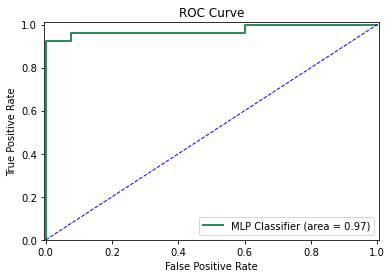

In [79]:
# Roc Curve:
plt.plot(fpr_rf, tpr_rf, color='seagreen', lw=2, 
         label='MLP Classifier (area = %0.2f)' % AUC_rf1)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.show()

# SVM

In [85]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# instantiate the model:
my_SVC = svm.SVC(C=10, kernel='rbf', gamma=0.0005, random_state=1, probability=True)

In [86]:
# start training
my_SVC.fit(train_images_new, y_train)

SVC(C=10, gamma=0.0005, probability=True, random_state=1)

In [87]:
# testing on the testing set:
y_predict = my_SVC.predict(test_images_new)

In [88]:
# print out the accuracy score
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)

0.9090909090909091


In [89]:
y_predict_prob_rf12 = my_SVC.predict_proba(test_images_new)

In [90]:
from sklearn import metrics
#Now we look for the tpr, fpr, and auc of the random forest Covid result
fpr_rf, tpr_rf, thresholds = metrics.roc_curve(y_test,y_predict_prob_rf12[:,0], pos_label=0)

print(fpr_rf)
print()
print(tpr_rf)

# AUC:
AUC_rf2 = metrics.auc(fpr_rf, tpr_rf)
print(AUC_rf2)

[0.   0.   0.   0.   0.   0.05 0.05 0.75 0.75 1.  ]

[0.         0.03846154 0.15384615 0.23076923 0.92307692 0.92307692
 0.96153846 0.96153846 1.         1.        ]
0.9692307692307691


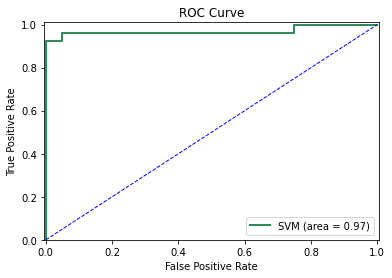

In [91]:
# Roc Curve:
plt.plot(fpr_rf, tpr_rf, color='seagreen', lw=2, 
         label='SVM (area = %0.2f)' % AUC_rf2)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.show()

In [92]:
from sklearn import metrics
# print confusion matrix
cm_SVC = metrics.confusion_matrix(y_test, y_predict)

print("Confusion matrix:")
print(cm_SVC)

Confusion matrix:
[[24  1  1]
 [ 0 18  2]
 [ 2  0 18]]


In [93]:
X_search = np.concatenate((train_images, test_images))
X_search.shape

(317, 10000)

In [94]:
y_search = np.concatenate((y_train, y_test))
y_search.shape

(317,)

In [95]:
# create the list for the search
li = [0.1, 1, 10, 100, 1e3, 5e3, 1e4, 5e4, 1e5]

# create a dictionary for grid parameter:
param_grid = dict(C = li)
print(param_grid,'\n')


X_n_pca = my_pca.fit_transform(X_search)

# instantiate the model:
my_SVC = svm.SVC(C=1, kernel='rbf', gamma=0.0005, random_state=1)

# creat the grid, and define the metric for evaluating the model: 
grid = GridSearchCV(my_SVC, param_grid, cv=10, scoring='accuracy')

# fit the grid (start the grid search):
grid.fit(X_n_pca, y_search)


{'C': [0.1, 1, 10, 100, 1000.0, 5000.0, 10000.0, 50000.0, 100000.0]} 



GridSearchCV(cv=10, estimator=SVC(C=1, gamma=0.0005, random_state=1),
             param_grid={'C': [0.1, 1, 10, 100, 1000.0, 5000.0, 10000.0,
                               50000.0, 100000.0]},
             scoring='accuracy')

In [96]:
# print out best score and best value for parameter C
print(grid.best_score_)
print(grid.best_params_)

0.9558467741935484
{'C': 10}


# Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier
my_RandomForest = RandomForestClassifier(n_estimators = 50, bootstrap = True, random_state=5)

my_RandomForest.fit(train_images, y_train)

y_predict_rf = my_RandomForest.predict(test_images)

In [98]:
score_rf = accuracy_score(y_test, y_predict_rf)

print('Accuracy:', score_rf)

Accuracy: 0.8333333333333334


In [99]:
# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_rf = my_RandomForest.predict_proba(test_images)
print(y_predict_prob_rf[:,0])

[0.08 0.06 0.88 0.14 0.02 0.06 0.02 0.06 0.98 0.78 0.96 0.3  0.88 0.06
 0.02 0.82 0.28 0.06 0.92 0.98 0.08 0.1  0.94 0.04 0.98 0.14 0.88 1.
 0.1  1.   1.   0.28 0.06 0.04 1.   0.04 0.08 1.   1.   0.76 0.34 0.3
 0.02 0.06 0.82 0.08 0.08 0.04 0.   0.   0.02 0.14 0.38 0.06 0.1  0.5
 0.92 0.06 1.   0.02 1.   0.96 0.02 0.28 0.1  0.18]


In [100]:
from sklearn import metrics
#Now we look for the tpr, fpr, and auc of the random forest Covid result
fpr_rf, tpr_rf, thresholds = metrics.roc_curve(y_test,y_predict_prob_rf[:,0], pos_label=0)

print(fpr_rf)
print()
print(tpr_rf)

# AUC:
AUC_rf = metrics.auc(fpr_rf, tpr_rf)
print(AUC_rf)

[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.025 0.025 0.05
 0.1   0.125 0.15  0.225 0.325 0.45  0.675 0.775 0.95  1.   ]

[0.         0.30769231 0.42307692 0.5        0.53846154 0.61538462
 0.73076923 0.80769231 0.88461538 0.88461538 0.92307692 0.92307692
 0.92307692 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]
0.9903846153846154


In [102]:
# print confusion matrix
cm_RF = metrics.confusion_matrix(y_test, y_predict_rf)

print("Confusion matrix:")
print(cm_RF)

Confusion matrix:
[[24  1  1]
 [ 0 14  6]
 [ 1  2 17]]


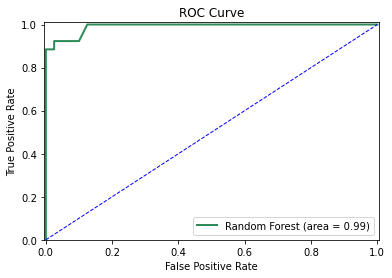

In [104]:
# Roc Curve:
plt.plot(fpr_rf, tpr_rf, color='seagreen', lw=2, 
         label='Random Forest (area = %0.2f)' % AUC_rf)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.show()